# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:19:47.507174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:19:50.397325
2025-04-14 21:19:50.397325


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:19:45"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

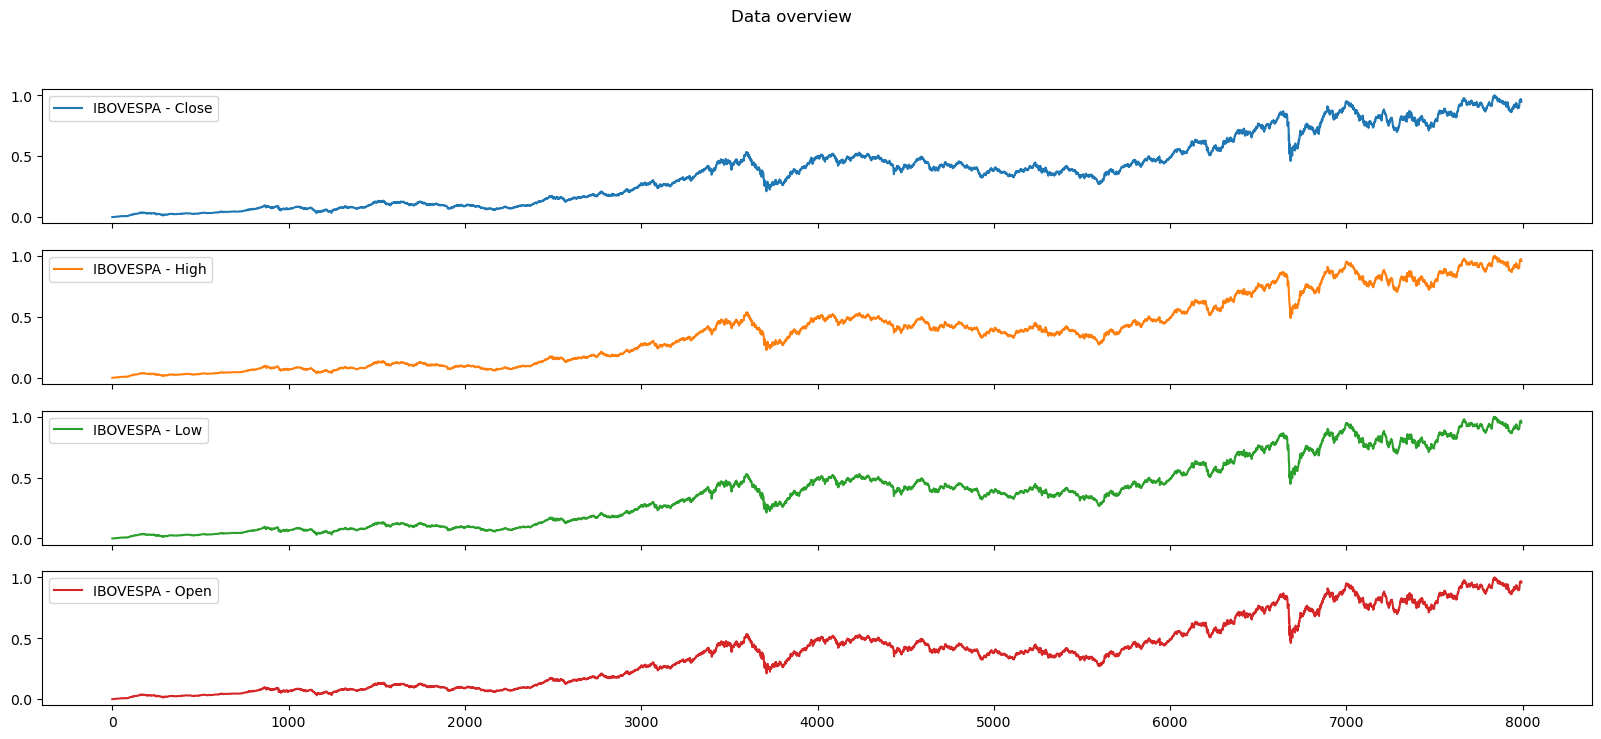

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

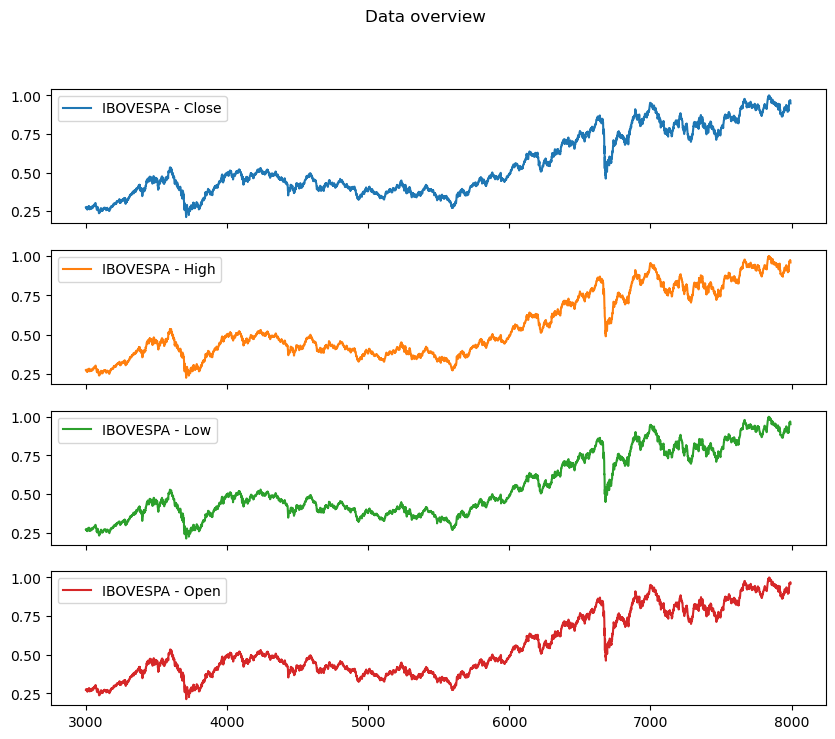

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

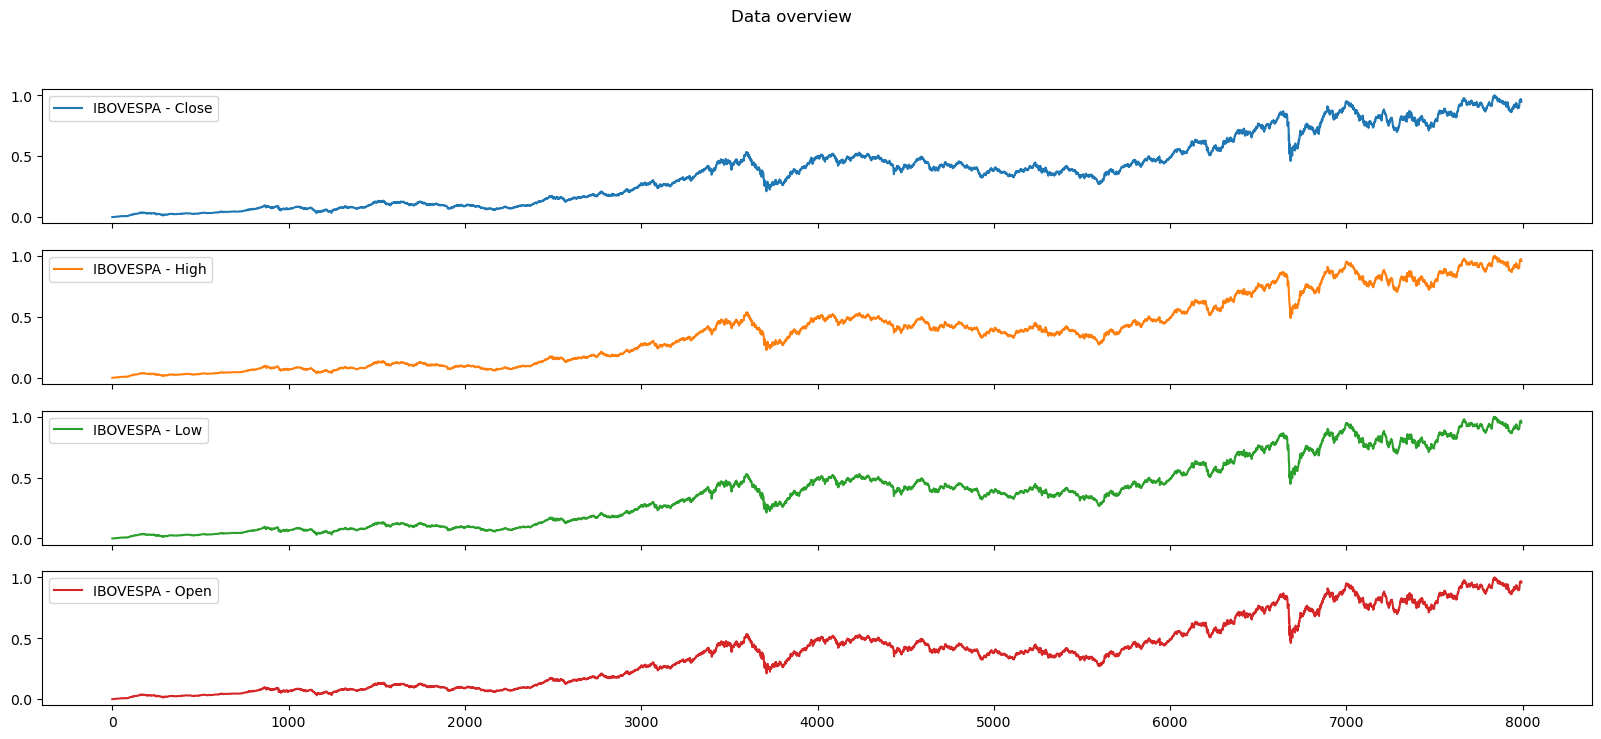

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

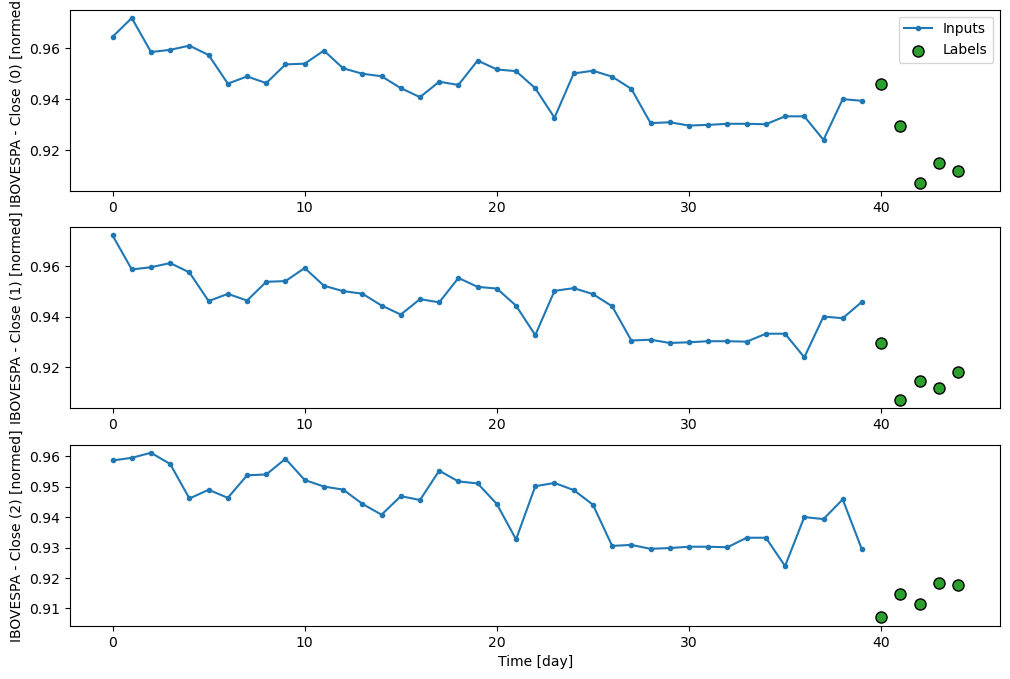

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:33 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 60.5460 - mean_squared_error: 5.3408e-05 - root_mean_squared_error: 0.0073 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.5557 - mean_squared_error: 6.5079e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.4754 - mean_squared_error: 7.0379e-05 - root_mean_squared_error: 0.0083

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 44.2515 - mean_squared_error: 7.1357e-05 - root_mean_squared_error: 0.0084

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 41.3820 - mean_squared_error: 7.0115e-05 - root_mean_squared_error: 0.0083

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.9302 - mean_squared_error: 6.9157e-05 - root_mean_squared_error: 0.0083

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.0383 - mean_squared_error: 7.3686e-05 - root_mean_squared_error: 0.0085

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.6211 - mean_squared_error: 8.2724e-05 - root_mean_squared_error: 0.0090

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.3762 - mean_squared_error: 8.9356e-05 - root_mean_squared_error: 0.0093

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.3661 - mean_squared_error: 9.6014e-05 - root_mean_squared_error: 0.0096

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.6878 - mean_squared_error: 1.0077e-04 - root_mean_squared_error: 0.0098

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.8510 - mean_squared_error: 1.0743e-04 - root_mean_squared_error: 0.0101

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.1382 - mean_squared_error: 1.1755e-04 - root_mean_squared_error: 0.0105

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.4630 - mean_squared_error: 1.2617e-04 - root_mean_squared_error: 0.0109

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.8453 - mean_squared_error: 1.3389e-04 - root_mean_squared_error: 0.0112

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.2774 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0115

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 28.7456 - mean_squared_error: 1.4626e-04 - root_mean_squared_error: 0.0117

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 28.2655 - mean_squared_error: 1.5127e-04 - root_mean_squared_error: 0.0119

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 27.8606 - mean_squared_error: 1.5801e-04 - root_mean_squared_error: 0.0122

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 27.5164 - mean_squared_error: 1.6862e-04 - root_mean_squared_error: 0.0125

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 27.1883 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0128

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.8653 - mean_squared_error: 1.8776e-04 - root_mean_squared_error: 0.0131

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.5436 - mean_squared_error: 1.9582e-04 - root_mean_squared_error: 0.0134

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 26.2327 - mean_squared_error: 2.0421e-04 - root_mean_squared_error: 0.0137

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.9400 - mean_squared_error: 2.1453e-04 - root_mean_squared_error: 0.0140

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.6643 - mean_squared_error: 2.2759e-04 - root_mean_squared_error: 0.0144

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.3995 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0148

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 25.1435 - mean_squared_error: 2.6060e-04 - root_mean_squared_error: 0.0152

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.9001 - mean_squared_error: 2.8059e-04 - root_mean_squared_error: 0.0157

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 24.6799 - mean_squared_error: 3.0486e-04 - root_mean_squared_error: 0.0162

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 24.4798 - mean_squared_error: 3.3919e-04 - root_mean_squared_error: 0.0169

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 24.3088 - mean_squared_error: 3.9932e-04 - root_mean_squared_error: 0.0178

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 24.1490 - mean_squared_error: 4.6404e-04 - root_mean_squared_error: 0.0188

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.9931 - mean_squared_error: 5.2702e-04 - root_mean_squared_error: 0.0198

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 23.8462 - mean_squared_error: 5.9020e-04 - root_mean_squared_error: 0.0207

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 23.7015 - mean_squared_error: 6.5050e-04 - root_mean_squared_error: 0.0216

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 23.5579 - mean_squared_error: 7.0731e-04 - root_mean_squared_error: 0.0224

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 23.4134 - mean_squared_error: 7.5988e-04 - root_mean_squared_error: 0.0232

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 23.2770 - mean_squared_error: 8.1174e-04 - root_mean_squared_error: 0.0240

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 23.1444 - mean_squared_error: 8.6097e-04 - root_mean_squared_error: 0.0247

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 23.0134 - mean_squared_error: 9.0734e-04 - root_mean_squared_error: 0.0254

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.8830 - mean_squared_error: 9.5085e-04 - root_mean_squared_error: 0.0260

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 22.7529 - mean_squared_error: 9.9132e-04 - root_mean_squared_error: 0.0266

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 22.6284 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0272    

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.5055 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 22.3877 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.2742 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 22.1637 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.0820 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 21.9751 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.8676 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 21.7590 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 21.6577 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 21.5600 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 21.4653 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 21.3723 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.2788 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 21.1853 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 21.0913 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 21.0218 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353 - val_loss: 0.1115 - val_mean_absolute_error: 0.1115 - val_mean_absolute_percentage_error: 11.8536 - val_mean_squared_error: 0.0131 - val_root_mean_squared_error: 0.1145 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.4714 - mean_absolute_error: 0.4714 - mean_absolute_percentage_error: 6332.3540 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4715

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 4468.5620 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4625

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 3633.8918 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4665

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4602 - mean_absolute_error: 0.4602 - mean_absolute_percentage_error: 3283.1514 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.5011

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 3050.9231 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.5036

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2844.1975 - mean_squared_error: 0.2523 - root_mean_squared_error: 0.4985

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 2661.9302 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4901

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 2501.5933 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4803

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 2360.2046 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4701

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 2196.7354 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4567

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 2124.0842 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4502

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 2056.7068 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4439

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1964.3373 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4348

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1880.9359 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4261

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1781.3868 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.4153

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1714.1609 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.4076

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1632.9177 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3980

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1595.4617 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3934

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1559.9069 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3890

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1509.8138 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3826

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1463.2792 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3765

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1419.9315 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3707

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1379.4641 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3652

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1341.5618 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3600

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1305.9574 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3549

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1272.4244 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3501

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1230.6395 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3440

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1201.2902 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3396

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1173.4869 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3354

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1147.1085 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3313

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1113.9587 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3261

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 1090.4873 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3224

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1060.8778 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3177

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 1039.8341 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3142

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 1019.7108 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3109

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1000.4457 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3077

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 981.9849 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.3046 

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 964.2931 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.3016

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 941.8057 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2978

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 925.7079 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2950

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 910.2220 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2924

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 890.4630 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2889

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 876.2662 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2864

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 862.5692 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2840

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 849.3453 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2816

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 832.4063 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2785

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 820.1916 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2763

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 812.2692 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2748

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 800.7023 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2727

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 789.4995 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2706

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 778.6434 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2686

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 764.6783 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2659

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 751.2642 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2634

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 741.5461 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2615

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 732.1052 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2597

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 722.9297 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 714.0097 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2561

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 702.4946 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2538

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 694.1275 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2522

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 685.9811 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2505

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 678.0462 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2489

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 670.3146 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2474

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 662.7787 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2458

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 655.4301 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2443

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 648.2618 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2428

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 641.2664 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2414

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 634.4390 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2400

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 627.7745 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2386

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 619.1295 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2368

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 612.8207 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2355

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 606.6548 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2342

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 600.6269 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2330

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 596.6824 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2321

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 592.7955 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2313

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 588.9651 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2305

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 583.3221 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2293

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 575.9898 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2278 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7101 - val_mean_squared_error: 4.5207e-04 - val_root_mean_squared_error: 0.0213 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 4976.8457 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3703

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 3483.2292 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3568

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 2763.5986 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3359

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 2335.1904 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.3126

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 2043.7198 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2932

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1828.2865 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2770

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1658.9565 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2632

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1521.7925 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2513

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 1408.0560 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2409

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 1312.1859 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2317

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 1230.2198 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2236

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1175.9690 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2180

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 1111.4987 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2112

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 1068.1372 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.2065

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 1015.9248 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2008

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 991.9162 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1981 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 947.5498 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1930

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 907.4626 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1883

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 879.8443 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1850

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 862.4775 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1829

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 837.8433 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1799

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 814.7471 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1771

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 793.0413 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1744

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 772.5993 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1718

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 753.3088 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1693

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 735.0718 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1669

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 712.2463 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1639

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 696.1469 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1618

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 680.8493 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1598

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 666.2917 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1578

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 656.9716 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1565

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 643.5289 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1547

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 634.9067 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1535

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 622.4498 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1518

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 610.5306 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1501

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 599.1156 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1485

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 588.1711 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1469

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 577.6665 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1454

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 564.2968 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1435

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 551.6017 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1417

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 539.5288 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1399

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 528.0317 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1382

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 517.0691 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1366

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 506.6032 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1350

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 496.5994 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1335

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 487.0269 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1320

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 477.8572 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1306

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 469.0641 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1292

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 460.6251 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1279

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 452.5178 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1266

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 444.7226 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1253

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 437.2220 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1241

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 429.9984 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1229

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 423.0361 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1218

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 416.3209 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1207

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 409.8396 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1196

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 403.5798 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1186

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 397.5299 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1176

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 391.6784 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1166

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 386.0175 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1157

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 380.5366 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 375.2279 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1139

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 370.0833 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1130

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 365.0954 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1122

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 360.2561 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1115

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 355.5590 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1107

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 352.1284 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1102 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5761 - val_mean_squared_error: 3.4317e-04 - val_root_mean_squared_error: 0.0185 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 2654.1033 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1984

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 1855.3429 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1904

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 1459.7074 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1771

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1223.4508 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1636

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1070.2417 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1534

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 956.8430 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1449 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 868.5201 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1378

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 796.9042 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1316

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 737.5507 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1262

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 687.5426 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1215

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 644.7736 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1173

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 607.6658 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1135

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 575.0969 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1100

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 546.2502 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1069

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 520.5001 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1040

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 497.3594 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1014

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 476.4437 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0989

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 457.4413 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0967

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 440.0859 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0946

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 424.1588 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0926

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 409.4862 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0908

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 399.2144 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0895

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 386.3924 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0878

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 374.4697 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0862

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 363.3545 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0848

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 355.5021 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0837

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 348.0261 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 340.9006 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0818

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 331.8993 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0806

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 323.4224 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0794

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 315.4237 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0784

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 307.8654 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 300.7161 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 293.9357 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0755

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 287.4973 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0747

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 281.3698 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 275.5305 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0732

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 269.9572 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0725

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 264.6315 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 259.5364 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0711

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 254.6569 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0704

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 249.9787 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 245.4893 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 241.1773 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 237.0317 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0679

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 233.0431 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0673

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 229.2020 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0668

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 225.5000 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 221.9293 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 218.4827 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0652

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 215.1538 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0647

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 211.9364 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0642

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 208.8246 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0637

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 205.8139 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0633

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 202.9002 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0628

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 200.0788 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0624

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 197.3451 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0620

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 194.6955 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0617

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 192.1251 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 190.2472 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0611

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 187.8063 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0607

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 186.6139 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380 - val_mean_absolute_percentage_error: 4.0281 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0412 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1247.5801 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0933

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 827.1407 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 660.5570 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 593.7765 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0692

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 523.6210 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0652

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 456.3478 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 407.3998 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 369.3815 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 338.7950 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 313.7682 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 292.6758 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 274.6192 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 258.9624 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 245.2531 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 233.1100 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 222.2749 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 212.5455 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 203.7561 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 195.7893 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 188.5334 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 181.8688 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 175.7257 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 170.0428 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 164.7676 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 159.8547 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 155.2671 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 150.9725 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 146.9409 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 143.1475 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 139.5716 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 137.0231 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 134.5808 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 132.2405 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 129.9964 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 127.8393 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 125.0893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.4724 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.9773 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.5969 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 115.3226 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 113.1461 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 111.0613 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 109.0623 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 107.1435 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 105.3017 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 103.5311 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 101.8275 - mean_squared_error: 9.9911e-04 - root_mean_squared_error: 0.0291

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 100.1897 - mean_squared_error: 9.8829e-04 - root_mean_squared_error: 0.0289

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.6125 - mean_squared_error: 9.7811e-04 - root_mean_squared_error: 0.0288 

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.0917 - mean_squared_error: 9.6836e-04 - root_mean_squared_error: 0.0286

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 95.6236 - mean_squared_error: 9.5896e-04 - root_mean_squared_error: 0.0285

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 94.2056 - mean_squared_error: 9.4995e-04 - root_mean_squared_error: 0.0284

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 92.8348 - mean_squared_error: 9.4124e-04 - root_mean_squared_error: 0.0283

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.5086 - mean_squared_error: 9.3281e-04 - root_mean_squared_error: 0.0282

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 90.2250 - mean_squared_error: 9.2493e-04 - root_mean_squared_error: 0.0281

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 88.9847 - mean_squared_error: 9.1909e-04 - root_mean_squared_error: 0.0280

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.7837 - mean_squared_error: 9.1412e-04 - root_mean_squared_error: 0.0280

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 86.6210 - mean_squared_error: 9.1080e-04 - root_mean_squared_error: 0.0280

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 85.4940 - mean_squared_error: 9.0834e-04 - root_mean_squared_error: 0.0280

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 84.6711 - mean_squared_error: 9.0680e-04 - root_mean_squared_error: 0.0280

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 83.8664 - mean_squared_error: 9.0551e-04 - root_mean_squared_error: 0.0280

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 82.8210 - mean_squared_error: 9.0416e-04 - root_mean_squared_error: 0.0280

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 81.8059 - mean_squared_error: 9.0281e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7534 - val_mean_squared_error: 3.7664e-04 - val_root_mean_squared_error: 0.0194 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 3020.9907 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2248

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 2112.6401 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2164

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 1679.2258 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2043

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1423.5133 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1907

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 1246.2308 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1790

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 1117.4575 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1696

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1015.8392 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1615

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 952.4391 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1561 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 880.6994 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1497

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 820.3344 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1441

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 768.7182 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1391

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 723.9686 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1345

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 684.7573 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1304

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 650.0746 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1267

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 619.1560 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1233

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 591.4044 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1202

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 566.3378 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1173

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 543.5722 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1146

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 522.7908 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1121

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 503.7324 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1097

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 486.1803 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1075

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 469.9541 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1055

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 454.9031 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1035

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 440.8990 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1017

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 427.8319 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1000

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 415.6074 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0983

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 404.1427 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0968

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 393.3673 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0953

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 383.2191 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0939

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 373.6439 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0925

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 364.5941 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0913

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 356.0240 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0900

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 347.8942 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0889

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 340.1706 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0877

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 332.8218 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 325.8206 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0856

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 319.1422 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0846

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 312.7637 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0837

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 306.6641 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0827

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 300.8249 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0818

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 295.2290 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0810

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 289.8612 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0801

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 284.7080 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0793

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 279.7556 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0786

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 274.9923 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0778

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 270.4071 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0771

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 265.9895 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0764

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 261.7302 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0757

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 257.6203 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0750

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 253.6520 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0743

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 249.8182 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0737

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 246.1115 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0731

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 242.5256 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0725

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 239.0557 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0719

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 235.6956 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0714

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 232.4403 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0708

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 229.2853 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0703

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 226.2250 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0699

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 223.9896 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0695

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 221.0847 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0691

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 218.9629 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0687 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295 - val_mean_absolute_percentage_error: 3.1117 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 1194.4463 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 804.0728 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0817  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 610.5131 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 508.5431 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 441.7659 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 393.1866 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 355.6787 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 325.6708 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 301.0593 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0498

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 280.3944 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 262.7742 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 247.5195 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 234.1732 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 222.3827 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 211.8855 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 202.4772 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 193.9870 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 186.2846 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 179.2571 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 174.3727 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 168.3163 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 162.7232 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.5390 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 152.7180 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 148.2213 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 144.0174 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.0760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.3723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 132.8854 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 129.5973 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 126.4925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 123.5569 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.7739 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.1323 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 115.6188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.2238 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.9391 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.7570 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.6698 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.6717 - mean_squared_error: 9.9164e-04 - root_mean_squared_error: 0.0284

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.7565 - mean_squared_error: 9.7622e-04 - root_mean_squared_error: 0.0281

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.3715 - mean_squared_error: 9.6505e-04 - root_mean_squared_error: 0.0280

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 99.5905 - mean_squared_error: 9.5077e-04 - root_mean_squared_error: 0.0278 

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.8794 - mean_squared_error: 9.3706e-04 - root_mean_squared_error: 0.0276

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.2340 - mean_squared_error: 9.2385e-04 - root_mean_squared_error: 0.0274

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.6516 - mean_squared_error: 9.1127e-04 - root_mean_squared_error: 0.0272

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.1276 - mean_squared_error: 8.9921e-04 - root_mean_squared_error: 0.0270

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.6590 - mean_squared_error: 8.8765e-04 - root_mean_squared_error: 0.0268

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.2422 - mean_squared_error: 8.7657e-04 - root_mean_squared_error: 0.0267

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.8748 - mean_squared_error: 8.6601e-04 - root_mean_squared_error: 0.0265

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 87.5542 - mean_squared_error: 8.5593e-04 - root_mean_squared_error: 0.0263

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 86.2774 - mean_squared_error: 8.4626e-04 - root_mean_squared_error: 0.0262

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.0420 - mean_squared_error: 8.3690e-04 - root_mean_squared_error: 0.0261

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 83.8482 - mean_squared_error: 8.2930e-04 - root_mean_squared_error: 0.0260

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 82.6929 - mean_squared_error: 8.2252e-04 - root_mean_squared_error: 0.0259

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.5750 - mean_squared_error: 8.1740e-04 - root_mean_squared_error: 0.0258

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 80.4920 - mean_squared_error: 8.1322e-04 - root_mean_squared_error: 0.0258

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.7018 - mean_squared_error: 8.1056e-04 - root_mean_squared_error: 0.0258

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 78.6756 - mean_squared_error: 8.0734e-04 - root_mean_squared_error: 0.0258

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 77.6797 - mean_squared_error: 8.0450e-04 - root_mean_squared_error: 0.0258

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 76.7127 - mean_squared_error: 8.0169e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3416 - val_mean_squared_error: 2.6658e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1811.5477 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1350

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1253.7831 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1273

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 977.4284 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1168 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 815.0152 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1073

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 711.0137 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1003

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 634.2552 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0945

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 574.6686 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0897

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 526.5671 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0856

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 486.8837 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0820

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 453.5782 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0788

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 425.1710 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0761

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 400.5525 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0736

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 378.9623 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 359.8554 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0692

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 342.8107 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0674

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 327.4994 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 313.6610 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 301.0884 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 289.6084 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 279.0758 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0599

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 269.3761 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 260.4086 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 252.0911 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 244.3524 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 237.1318 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 230.3765 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 224.0408 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 218.0861 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 212.4779 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 207.1879 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 202.1880 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 197.4526 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 194.0614 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 189.7385 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 185.6263 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 181.7096 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 177.9747 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 174.4086 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 170.9992 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 167.7362 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 164.6097 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 161.6114 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 158.7339 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 155.9690 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 153.3105 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 150.7520 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 148.2877 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 145.9121 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 143.6204 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 141.4082 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 139.2713 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 137.2056 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 135.2076 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 133.2749 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 131.4038 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 129.5914 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 127.8358 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 126.1335 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 124.4822 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 122.8788 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 122.0956 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219 - val_mean_absolute_percentage_error: 2.3106 - val_mean_squared_error: 6.6183e-04 - val_root_mean_squared_error: 0.0257 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 960.5984 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 644.4172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0664

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 489.5700 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 410.1671 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 358.2181 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 320.3350 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 297.5823 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 284.4727 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 272.6269 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 256.9023 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 243.1470 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 231.0010 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 220.1871 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 210.4717 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 201.6996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 193.7327 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 186.4558 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 179.7820 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 173.6344 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 167.9547 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 162.6919 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 157.8037 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 153.2506 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 147.6361 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 142.4761 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 137.7141 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.3015 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 130.1990 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.2571 - mean_squared_error: 9.8598e-04 - root_mean_squared_error: 0.0289

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.5627 - mean_squared_error: 9.5803e-04 - root_mean_squared_error: 0.0285

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 120.1060 - mean_squared_error: 9.3197e-04 - root_mean_squared_error: 0.0280

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.8624 - mean_squared_error: 9.0755e-04 - root_mean_squared_error: 0.0276

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.8125 - mean_squared_error: 8.8474e-04 - root_mean_squared_error: 0.0272

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 110.9394 - mean_squared_error: 8.6350e-04 - root_mean_squared_error: 0.0268

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.8918 - mean_squared_error: 8.4858e-04 - root_mean_squared_error: 0.0266

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 106.2952 - mean_squared_error: 8.2996e-04 - root_mean_squared_error: 0.0263

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.4399 - mean_squared_error: 8.1683e-04 - root_mean_squared_error: 0.0261

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.6575 - mean_squared_error: 8.0430e-04 - root_mean_squared_error: 0.0258

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.9436 - mean_squared_error: 7.9239e-04 - root_mean_squared_error: 0.0256

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.2942 - mean_squared_error: 7.8103e-04 - root_mean_squared_error: 0.0254 

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.7051 - mean_squared_error: 7.7012e-04 - root_mean_squared_error: 0.0253

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.6743 - mean_squared_error: 7.5619e-04 - root_mean_squared_error: 0.0250

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.7382 - mean_squared_error: 7.4302e-04 - root_mean_squared_error: 0.0248

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.8894 - mean_squared_error: 7.3047e-04 - root_mean_squared_error: 0.0246

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.5563 - mean_squared_error: 7.2140e-04 - root_mean_squared_error: 0.0244

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.2663 - mean_squared_error: 7.1262e-04 - root_mean_squared_error: 0.0243

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.0177 - mean_squared_error: 7.0411e-04 - root_mean_squared_error: 0.0241

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.8082 - mean_squared_error: 6.9586e-04 - root_mean_squared_error: 0.0240

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6358 - mean_squared_error: 6.8784e-04 - root_mean_squared_error: 0.0238

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.4990 - mean_squared_error: 6.8007e-04 - root_mean_squared_error: 0.0237

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.3964 - mean_squared_error: 6.7256e-04 - root_mean_squared_error: 0.0236

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.0361 - mean_squared_error: 6.7010e-04 - root_mean_squared_error: 0.0235

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.6794 - mean_squared_error: 6.6767e-04 - root_mean_squared_error: 0.0235

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.9763 - mean_squared_error: 6.6287e-04 - root_mean_squared_error: 0.0234

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.2867 - mean_squared_error: 6.5816e-04 - root_mean_squared_error: 0.0233

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.2770 - mean_squared_error: 6.5128e-04 - root_mean_squared_error: 0.0232

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.6199 - mean_squared_error: 6.4683e-04 - root_mean_squared_error: 0.0231

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.9751 - mean_squared_error: 6.4247e-04 - root_mean_squared_error: 0.0230

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.6571 - mean_squared_error: 6.4033e-04 - root_mean_squared_error: 0.0230

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.0299 - mean_squared_error: 6.3610e-04 - root_mean_squared_error: 0.0229

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.4141 - mean_squared_error: 6.3196e-04 - root_mean_squared_error: 0.0228

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.8093 - mean_squared_error: 6.2791e-04 - root_mean_squared_error: 0.0227

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.2153 - mean_squared_error: 6.2394e-04 - root_mean_squared_error: 0.0227

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.3437 - mean_squared_error: 6.1816e-04 - root_mean_squared_error: 0.0226

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.7753 - mean_squared_error: 6.1444e-04 - root_mean_squared_error: 0.0225

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.9412 - mean_squared_error: 6.0904e-04 - root_mean_squared_error: 0.0224

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.1280 - mean_squared_error: 6.0384e-04 - root_mean_squared_error: 0.0223

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.5972 - mean_squared_error: 6.0048e-04 - root_mean_squared_error: 0.0222

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.0751 - mean_squared_error: 5.9718e-04 - root_mean_squared_error: 0.0222

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.5615 - mean_squared_error: 5.9393e-04 - root_mean_squared_error: 0.0221

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.0563 - mean_squared_error: 5.9096e-04 - root_mean_squared_error: 0.0221

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.5599 - mean_squared_error: 5.8843e-04 - root_mean_squared_error: 0.0220

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.0715 - mean_squared_error: 5.8599e-04 - root_mean_squared_error: 0.0220

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.5910 - mean_squared_error: 5.8369e-04 - root_mean_squared_error: 0.0220

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.1183 - mean_squared_error: 5.8175e-04 - root_mean_squared_error: 0.0219

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.6533 - mean_squared_error: 5.8012e-04 - root_mean_squared_error: 0.0219

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.9694 - mean_squared_error: 5.7795e-04 - root_mean_squared_error: 0.0219

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.3018 - mean_squared_error: 5.7641e-04 - root_mean_squared_error: 0.0219

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 66.6495 - mean_squared_error: 5.7512e-04 - root_mean_squared_error: 0.0219

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.0119 - mean_squared_error: 5.7406e-04 - root_mean_squared_error: 0.0219

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 65.3884 - mean_squared_error: 5.7321e-04 - root_mean_squared_error: 0.0219

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 64.7782 - mean_squared_error: 5.7236e-04 - root_mean_squared_error: 0.0219

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 64.3793 - mean_squared_error: 5.7181e-04 - root_mean_squared_error: 0.0219 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2837 - val_mean_squared_error: 2.4495e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 1032.5179 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0780

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 699.7320 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 532.3805 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 444.8106 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 387.2339 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 345.4683 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 313.0706 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 287.0145 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 265.5330 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 251.7086 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 235.6858 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 221.8418 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 209.7449 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 199.0680 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 189.5641 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 181.0428 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 175.2058 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 171.5485 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 166.3831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.5646 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 155.6159 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 150.1482 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 145.1044 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.4335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.0937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.0336 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 129.1897 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 125.5897 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 123.0354 - mean_squared_error: 9.9333e-04 - root_mean_squared_error: 0.0286

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.5969 - mean_squared_error: 9.7418e-04 - root_mean_squared_error: 0.0283

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.0316 - mean_squared_error: 9.6197e-04 - root_mean_squared_error: 0.0281

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.7687 - mean_squared_error: 9.4442e-04 - root_mean_squared_error: 0.0279

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.6031 - mean_squared_error: 9.2785e-04 - root_mean_squared_error: 0.0276

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.8558 - mean_squared_error: 9.0701e-04 - root_mean_squared_error: 0.0272

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 109.8919 - mean_squared_error: 8.9217e-04 - root_mean_squared_error: 0.0270

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 107.3918 - mean_squared_error: 8.7334e-04 - root_mean_squared_error: 0.0267

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.0176 - mean_squared_error: 8.5553e-04 - root_mean_squared_error: 0.0264

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.7592 - mean_squared_error: 8.3861e-04 - root_mean_squared_error: 0.0261

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.6082 - mean_squared_error: 8.2252e-04 - root_mean_squared_error: 0.0258

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.0613 - mean_squared_error: 8.1101e-04 - root_mean_squared_error: 0.0256 

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.0809 - mean_squared_error: 7.9633e-04 - root_mean_squared_error: 0.0254

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.1884 - mean_squared_error: 7.8231e-04 - root_mean_squared_error: 0.0252

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.3776 - mean_squared_error: 7.6889e-04 - root_mean_squared_error: 0.0249

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.6432 - mean_squared_error: 7.5602e-04 - root_mean_squared_error: 0.0247

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.9801 - mean_squared_error: 7.4368e-04 - root_mean_squared_error: 0.0245

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.3845 - mean_squared_error: 7.3187e-04 - root_mean_squared_error: 0.0243

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.2295 - mean_squared_error: 7.2335e-04 - root_mean_squared_error: 0.0241

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.1083 - mean_squared_error: 7.1506e-04 - root_mean_squared_error: 0.0240

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.0194 - mean_squared_error: 7.0703e-04 - root_mean_squared_error: 0.0238

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.9617 - mean_squared_error: 6.9926e-04 - root_mean_squared_error: 0.0237

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.9336 - mean_squared_error: 6.9172e-04 - root_mean_squared_error: 0.0236

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.9337 - mean_squared_error: 6.8440e-04 - root_mean_squared_error: 0.0234

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.6423 - mean_squared_error: 6.7498e-04 - root_mean_squared_error: 0.0233

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.3964 - mean_squared_error: 6.6592e-04 - root_mean_squared_error: 0.0231

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.1936 - mean_squared_error: 6.5729e-04 - root_mean_squared_error: 0.0230

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.0317 - mean_squared_error: 6.4905e-04 - root_mean_squared_error: 0.0228

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.9084 - mean_squared_error: 6.4117e-04 - root_mean_squared_error: 0.0227

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.8217 - mean_squared_error: 6.3374e-04 - root_mean_squared_error: 0.0225

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.7709 - mean_squared_error: 6.2724e-04 - root_mean_squared_error: 0.0224

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.7538 - mean_squared_error: 6.2137e-04 - root_mean_squared_error: 0.0224

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.7689 - mean_squared_error: 6.1626e-04 - root_mean_squared_error: 0.0223

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.8154 - mean_squared_error: 6.1230e-04 - root_mean_squared_error: 0.0222

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.8910 - mean_squared_error: 6.0889e-04 - root_mean_squared_error: 0.0222

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.9945 - mean_squared_error: 6.0607e-04 - root_mean_squared_error: 0.0222

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.1238 - mean_squared_error: 6.0340e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.6986 - mean_squared_error: 6.0210e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4642 - val_mean_squared_error: 3.1372e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 948.8137 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0717

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 639.5253 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0645 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 513.9287 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 440.1879 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 376.7885 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 342.2444 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 306.6616 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 285.2227 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 261.5397 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 242.0470 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 225.6406 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 211.6217 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 199.4607 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 188.8060 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 179.3797 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 170.9738 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 163.4253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 156.6089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 150.4247 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 144.7797 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 139.6007 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 134.8320 - mean_squared_error: 9.7997e-04 - root_mean_squared_error: 0.0288

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 130.4221 - mean_squared_error: 9.4847e-04 - root_mean_squared_error: 0.0283

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 126.3303 - mean_squared_error: 9.1926e-04 - root_mean_squared_error: 0.0278

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.5208 - mean_squared_error: 8.9206e-04 - root_mean_squared_error: 0.0274

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 118.9644 - mean_squared_error: 8.6674e-04 - root_mean_squared_error: 0.0269

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 115.6355 - mean_squared_error: 8.4308e-04 - root_mean_squared_error: 0.0265

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.5115 - mean_squared_error: 8.2094e-04 - root_mean_squared_error: 0.0261

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 109.5743 - mean_squared_error: 8.0030e-04 - root_mean_squared_error: 0.0257

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 106.8070 - mean_squared_error: 7.8109e-04 - root_mean_squared_error: 0.0254

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.1972 - mean_squared_error: 7.6335e-04 - root_mean_squared_error: 0.0251

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.7304 - mean_squared_error: 7.4675e-04 - root_mean_squared_error: 0.0248

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.9660 - mean_squared_error: 7.3494e-04 - root_mean_squared_error: 0.0246 

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.7191 - mean_squared_error: 7.1997e-04 - root_mean_squared_error: 0.0243

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.5842 - mean_squared_error: 7.0583e-04 - root_mean_squared_error: 0.0241

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.5524 - mean_squared_error: 6.9237e-04 - root_mean_squared_error: 0.0238

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.6167 - mean_squared_error: 6.7961e-04 - root_mean_squared_error: 0.0236

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.7704 - mean_squared_error: 6.6753e-04 - root_mean_squared_error: 0.0234

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.0070 - mean_squared_error: 6.5602e-04 - root_mean_squared_error: 0.0231

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.3203 - mean_squared_error: 6.4500e-04 - root_mean_squared_error: 0.0229

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.7057 - mean_squared_error: 6.3445e-04 - root_mean_squared_error: 0.0227

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.1581 - mean_squared_error: 6.2433e-04 - root_mean_squared_error: 0.0226

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.6734 - mean_squared_error: 6.1462e-04 - root_mean_squared_error: 0.0224

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.2484 - mean_squared_error: 6.0536e-04 - root_mean_squared_error: 0.0222

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.8788 - mean_squared_error: 5.9645e-04 - root_mean_squared_error: 0.0220

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.5618 - mean_squared_error: 5.8790e-04 - root_mean_squared_error: 0.0219

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.2943 - mean_squared_error: 5.7973e-04 - root_mean_squared_error: 0.0217

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.0732 - mean_squared_error: 5.7188e-04 - root_mean_squared_error: 0.0216

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.8958 - mean_squared_error: 5.6436e-04 - root_mean_squared_error: 0.0214

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.7598 - mean_squared_error: 5.5712e-04 - root_mean_squared_error: 0.0213

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.6630 - mean_squared_error: 5.5023e-04 - root_mean_squared_error: 0.0211

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.6035 - mean_squared_error: 5.4368e-04 - root_mean_squared_error: 0.0210

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.5790 - mean_squared_error: 5.3743e-04 - root_mean_squared_error: 0.0209

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.5879 - mean_squared_error: 5.3157e-04 - root_mean_squared_error: 0.0208

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.6298 - mean_squared_error: 5.2666e-04 - root_mean_squared_error: 0.0207

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.7023 - mean_squared_error: 5.2233e-04 - root_mean_squared_error: 0.0206

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.8043 - mean_squared_error: 5.1876e-04 - root_mean_squared_error: 0.0206

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.9348 - mean_squared_error: 5.1621e-04 - root_mean_squared_error: 0.0206

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.0920 - mean_squared_error: 5.1418e-04 - root_mean_squared_error: 0.0206

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.2745 - mean_squared_error: 5.1263e-04 - root_mean_squared_error: 0.0206

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.4805 - mean_squared_error: 5.1119e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.0927 - mean_squared_error: 5.1048e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3877 - val_mean_squared_error: 2.8412e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 918.1063 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0700

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 618.7597 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 498.0330 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 410.4145 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 355.8333 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 316.5488 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 286.3289 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 262.2432 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 242.4497 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 225.8259 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 211.6590 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 199.3984 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 188.6764 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 179.1976 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 172.7755 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 164.9896 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 157.9733 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.6168 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 145.8299 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.5295 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 135.6544 - mean_squared_error: 9.8874e-04 - root_mean_squared_error: 0.0291

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 131.1538 - mean_squared_error: 9.5660e-04 - root_mean_squared_error: 0.0286

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.9823 - mean_squared_error: 9.2680e-04 - root_mean_squared_error: 0.0281

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 123.1033 - mean_squared_error: 8.9909e-04 - root_mean_squared_error: 0.0276

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.4847 - mean_squared_error: 8.7325e-04 - root_mean_squared_error: 0.0272

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.1010 - mean_squared_error: 8.4916e-04 - root_mean_squared_error: 0.0267

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.9282 - mean_squared_error: 8.2659e-04 - root_mean_squared_error: 0.0263

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.9467 - mean_squared_error: 8.0549e-04 - root_mean_squared_error: 0.0260

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.1400 - mean_squared_error: 7.8585e-04 - root_mean_squared_error: 0.0256

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.4930 - mean_squared_error: 7.6762e-04 - root_mean_squared_error: 0.0253

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 101.9941 - mean_squared_error: 7.5072e-04 - root_mean_squared_error: 0.0250

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.6285 - mean_squared_error: 7.3482e-04 - root_mean_squared_error: 0.0247 

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.3846 - mean_squared_error: 7.1981e-04 - root_mean_squared_error: 0.0244

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.2530 - mean_squared_error: 7.0564e-04 - root_mean_squared_error: 0.0242

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.2246 - mean_squared_error: 6.9216e-04 - root_mean_squared_error: 0.0239

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.2921 - mean_squared_error: 6.7935e-04 - root_mean_squared_error: 0.0237

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.4491 - mean_squared_error: 6.6722e-04 - root_mean_squared_error: 0.0234

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.6890 - mean_squared_error: 6.5567e-04 - root_mean_squared_error: 0.0232

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.0059 - mean_squared_error: 6.4463e-04 - root_mean_squared_error: 0.0230

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.3946 - mean_squared_error: 6.3405e-04 - root_mean_squared_error: 0.0228

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.8505 - mean_squared_error: 6.2390e-04 - root_mean_squared_error: 0.0226

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.3693 - mean_squared_error: 6.1416e-04 - root_mean_squared_error: 0.0225

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.9476 - mean_squared_error: 6.0486e-04 - root_mean_squared_error: 0.0223

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.5815 - mean_squared_error: 5.9592e-04 - root_mean_squared_error: 0.0221

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.2676 - mean_squared_error: 5.8733e-04 - root_mean_squared_error: 0.0219

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.0034 - mean_squared_error: 5.7912e-04 - root_mean_squared_error: 0.0218

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.7856 - mean_squared_error: 5.7124e-04 - root_mean_squared_error: 0.0216

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.6115 - mean_squared_error: 5.6368e-04 - root_mean_squared_error: 0.0215

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.4787 - mean_squared_error: 5.5641e-04 - root_mean_squared_error: 0.0213

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.3850 - mean_squared_error: 5.4947e-04 - root_mean_squared_error: 0.0212

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.3285 - mean_squared_error: 5.4284e-04 - root_mean_squared_error: 0.0211

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.3070 - mean_squared_error: 5.3653e-04 - root_mean_squared_error: 0.0210

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.5628 - mean_squared_error: 5.3195e-04 - root_mean_squared_error: 0.0209

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.8370 - mean_squared_error: 5.2786e-04 - root_mean_squared_error: 0.0208

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.8969 - mean_squared_error: 5.2295e-04 - root_mean_squared_error: 0.0207

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.9868 - mean_squared_error: 5.1873e-04 - root_mean_squared_error: 0.0206

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.1053 - mean_squared_error: 5.1514e-04 - root_mean_squared_error: 0.0206

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.2518 - mean_squared_error: 5.1259e-04 - root_mean_squared_error: 0.0206

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.4240 - mean_squared_error: 5.1043e-04 - root_mean_squared_error: 0.0206

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.6209 - mean_squared_error: 5.0870e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.8408 - mean_squared_error: 5.0702e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.6497 - mean_squared_error: 5.0661e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4703 - val_mean_squared_error: 3.1307e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 853.1994 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0650

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 573.0531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 435.7054 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 367.1555 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 321.6331 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 288.0645 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 261.7386 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 240.4147 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 222.7644 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 207.8599 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 195.0928 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 184.0014 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 174.2662 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 165.6395 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 157.9376 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 151.0150 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 144.7584 - mean_squared_error: 9.7828e-04 - root_mean_squared_error: 0.0293

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 139.0776 - mean_squared_error: 9.4060e-04 - root_mean_squared_error: 0.0286

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 133.8888 - mean_squared_error: 9.0610e-04 - root_mean_squared_error: 0.0280

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.1259 - mean_squared_error: 8.7439e-04 - root_mean_squared_error: 0.0275

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.7399 - mean_squared_error: 8.4526e-04 - root_mean_squared_error: 0.0269

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.6831 - mean_squared_error: 8.1832e-04 - root_mean_squared_error: 0.0264

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 116.9180 - mean_squared_error: 7.9334e-04 - root_mean_squared_error: 0.0260

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.4115 - mean_squared_error: 7.7008e-04 - root_mean_squared_error: 0.0255

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 110.1372 - mean_squared_error: 7.4842e-04 - root_mean_squared_error: 0.0251

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.0716 - mean_squared_error: 7.2818e-04 - root_mean_squared_error: 0.0248

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.1940 - mean_squared_error: 7.0924e-04 - root_mean_squared_error: 0.0244

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.1490 - mean_squared_error: 6.9589e-04 - root_mean_squared_error: 0.0241

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.5614 - mean_squared_error: 6.7921e-04 - root_mean_squared_error: 0.0238 

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.1210 - mean_squared_error: 6.6381e-04 - root_mean_squared_error: 0.0235

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.8158 - mean_squared_error: 6.4951e-04 - root_mean_squared_error: 0.0232

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.6327 - mean_squared_error: 6.3606e-04 - root_mean_squared_error: 0.0230

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.5613 - mean_squared_error: 6.2339e-04 - root_mean_squared_error: 0.0227

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.5928 - mean_squared_error: 6.1141e-04 - root_mean_squared_error: 0.0225

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.7190 - mean_squared_error: 6.0002e-04 - root_mean_squared_error: 0.0223

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.9337 - mean_squared_error: 5.8923e-04 - root_mean_squared_error: 0.0221

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.2305 - mean_squared_error: 5.7900e-04 - root_mean_squared_error: 0.0219

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.6035 - mean_squared_error: 5.6926e-04 - root_mean_squared_error: 0.0217

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.0471 - mean_squared_error: 5.5993e-04 - root_mean_squared_error: 0.0215

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.5570 - mean_squared_error: 5.5100e-04 - root_mean_squared_error: 0.0213

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.1286 - mean_squared_error: 5.4243e-04 - root_mean_squared_error: 0.0211

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.7582 - mean_squared_error: 5.3420e-04 - root_mean_squared_error: 0.0210

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.4427 - mean_squared_error: 5.2636e-04 - root_mean_squared_error: 0.0208

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.1782 - mean_squared_error: 5.1881e-04 - root_mean_squared_error: 0.0207

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.9621 - mean_squared_error: 5.1156e-04 - root_mean_squared_error: 0.0205

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.7916 - mean_squared_error: 5.0464e-04 - root_mean_squared_error: 0.0204

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.6639 - mean_squared_error: 4.9800e-04 - root_mean_squared_error: 0.0202

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.5765 - mean_squared_error: 4.9163e-04 - root_mean_squared_error: 0.0201

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.5271 - mean_squared_error: 4.8551e-04 - root_mean_squared_error: 0.0200

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.5140 - mean_squared_error: 4.7969e-04 - root_mean_squared_error: 0.0199

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.5351 - mean_squared_error: 4.7417e-04 - root_mean_squared_error: 0.0198

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.5886 - mean_squared_error: 4.6889e-04 - root_mean_squared_error: 0.0196

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.6727 - mean_squared_error: 4.6397e-04 - root_mean_squared_error: 0.0196

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.7873 - mean_squared_error: 4.5988e-04 - root_mean_squared_error: 0.0195

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.9300 - mean_squared_error: 4.5629e-04 - root_mean_squared_error: 0.0194

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.1000 - mean_squared_error: 4.5333e-04 - root_mean_squared_error: 0.0194

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.2963 - mean_squared_error: 4.5132e-04 - root_mean_squared_error: 0.0194

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.5171 - mean_squared_error: 4.4978e-04 - root_mean_squared_error: 0.0194

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.7614 - mean_squared_error: 4.4867e-04 - root_mean_squared_error: 0.0194

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.0274 - mean_squared_error: 4.4765e-04 - root_mean_squared_error: 0.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.6688 - mean_squared_error: 4.4715e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3806 - val_mean_squared_error: 2.7912e-04 - val_root_mean_squared_error: 0.0167 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 816.4071 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0617

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 548.4796 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0552

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 440.3363 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 362.7102 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 324.3591 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 286.8544 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 258.6725 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 236.4279 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 218.2480 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 203.0648 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 190.1863 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 179.0761 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 169.3690 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 160.8000 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 153.1703 - mean_squared_error: 9.6289e-04 - root_mean_squared_error: 0.0293

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 146.3289 - mean_squared_error: 9.2156e-04 - root_mean_squared_error: 0.0286

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 140.1589 - mean_squared_error: 8.8413e-04 - root_mean_squared_error: 0.0279

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 134.5635 - mean_squared_error: 8.5003e-04 - root_mean_squared_error: 0.0273

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 129.4651 - mean_squared_error: 8.1883e-04 - root_mean_squared_error: 0.0267

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 124.7921 - mean_squared_error: 7.9015e-04 - root_mean_squared_error: 0.0262

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 120.4921 - mean_squared_error: 7.6374e-04 - root_mean_squared_error: 0.0257

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.5217 - mean_squared_error: 7.3938e-04 - root_mean_squared_error: 0.0252

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.8407 - mean_squared_error: 7.1679e-04 - root_mean_squared_error: 0.0248

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.4167 - mean_squared_error: 6.9577e-04 - root_mean_squared_error: 0.0244

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 106.2217 - mean_squared_error: 6.7617e-04 - root_mean_squared_error: 0.0240

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 103.2334 - mean_squared_error: 6.5789e-04 - root_mean_squared_error: 0.0236

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 100.4305 - mean_squared_error: 6.4077e-04 - root_mean_squared_error: 0.0233

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.7959 - mean_squared_error: 6.2477e-04 - root_mean_squared_error: 0.0230 

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.3153 - mean_squared_error: 6.0994e-04 - root_mean_squared_error: 0.0227

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.9757 - mean_squared_error: 5.9622e-04 - root_mean_squared_error: 0.0224

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 91.3075 - mean_squared_error: 5.8668e-04 - root_mean_squared_error: 0.0222

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.7070 - mean_squared_error: 5.7758e-04 - root_mean_squared_error: 0.0220

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.6704 - mean_squared_error: 5.6605e-04 - root_mean_squared_error: 0.0218

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.7366 - mean_squared_error: 5.5519e-04 - root_mean_squared_error: 0.0216

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.8977 - mean_squared_error: 5.4490e-04 - root_mean_squared_error: 0.0214

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.1463 - mean_squared_error: 5.3510e-04 - root_mean_squared_error: 0.0212

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.4768 - mean_squared_error: 5.2583e-04 - root_mean_squared_error: 0.0210

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.8832 - mean_squared_error: 5.1704e-04 - root_mean_squared_error: 0.0208

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.3601 - mean_squared_error: 5.0865e-04 - root_mean_squared_error: 0.0206

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.9024 - mean_squared_error: 5.0061e-04 - root_mean_squared_error: 0.0204

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.8498 - mean_squared_error: 4.9481e-04 - root_mean_squared_error: 0.0203

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.4968 - mean_squared_error: 4.8733e-04 - root_mean_squared_error: 0.0202

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.1986 - mean_squared_error: 4.8016e-04 - root_mean_squared_error: 0.0200

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.9522 - mean_squared_error: 4.7332e-04 - root_mean_squared_error: 0.0199

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.7540 - mean_squared_error: 4.6674e-04 - root_mean_squared_error: 0.0197

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.6014 - mean_squared_error: 4.6043e-04 - root_mean_squared_error: 0.0196

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4920 - mean_squared_error: 4.5439e-04 - root_mean_squared_error: 0.0195

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.4230 - mean_squared_error: 4.4861e-04 - root_mean_squared_error: 0.0193

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.3920 - mean_squared_error: 4.4306e-04 - root_mean_squared_error: 0.0192

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.3970 - mean_squared_error: 4.3773e-04 - root_mean_squared_error: 0.0191

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.4362 - mean_squared_error: 4.3267e-04 - root_mean_squared_error: 0.0190

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.5077 - mean_squared_error: 4.2786e-04 - root_mean_squared_error: 0.0189

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.6098 - mean_squared_error: 4.2328e-04 - root_mean_squared_error: 0.0188

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.7410 - mean_squared_error: 4.1902e-04 - root_mean_squared_error: 0.0187

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.9009 - mean_squared_error: 4.1557e-04 - root_mean_squared_error: 0.0186

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.0875 - mean_squared_error: 4.1258e-04 - root_mean_squared_error: 0.0186

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.2998 - mean_squared_error: 4.1017e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.5371 - mean_squared_error: 4.0860e-04 - root_mean_squared_error: 0.0185

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.7975 - mean_squared_error: 4.0742e-04 - root_mean_squared_error: 0.0185

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.0801 - mean_squared_error: 4.0664e-04 - root_mean_squared_error: 0.0185

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.3832 - mean_squared_error: 4.0592e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.0427 - mean_squared_error: 4.0558e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4193 - val_mean_squared_error: 2.9194e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 774.6245 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0585

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 518.5302 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 393.1946 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 329.4248 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 286.6972 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 255.6730 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 231.7140 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 212.4593 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 196.6204 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 183.3155 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 171.9491 - mean_squared_error: 9.9122e-04 - root_mean_squared_error: 0.0298

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 162.0884 - mean_squared_error: 9.3578e-04 - root_mean_squared_error: 0.0289

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 153.4459 - mean_squared_error: 8.8710e-04 - root_mean_squared_error: 0.0280

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 145.7969 - mean_squared_error: 8.4393e-04 - root_mean_squared_error: 0.0273

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 138.9754 - mean_squared_error: 8.0535e-04 - root_mean_squared_error: 0.0266

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 134.3216 - mean_squared_error: 7.7896e-04 - root_mean_squared_error: 0.0261

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 128.6508 - mean_squared_error: 7.4675e-04 - root_mean_squared_error: 0.0254

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.5115 - mean_squared_error: 7.1748e-04 - root_mean_squared_error: 0.0249

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 118.8271 - mean_squared_error: 6.9073e-04 - root_mean_squared_error: 0.0243

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 114.5329 - mean_squared_error: 6.6617e-04 - root_mean_squared_error: 0.0239

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.5833 - mean_squared_error: 6.4364e-04 - root_mean_squared_error: 0.0234

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.9363 - mean_squared_error: 6.2288e-04 - root_mean_squared_error: 0.0230

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.5558 - mean_squared_error: 6.0366e-04 - root_mean_squared_error: 0.0226

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.4113 - mean_squared_error: 5.8579e-04 - root_mean_squared_error: 0.0222

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.4776 - mean_squared_error: 5.6917e-04 - root_mean_squared_error: 0.0218 

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.7337 - mean_squared_error: 5.5369e-04 - root_mean_squared_error: 0.0215

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.1601 - mean_squared_error: 5.3921e-04 - root_mean_squared_error: 0.0212

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.7415 - mean_squared_error: 5.2575e-04 - root_mean_squared_error: 0.0209

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.4644 - mean_squared_error: 5.1333e-04 - root_mean_squared_error: 0.0206

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.3175 - mean_squared_error: 5.0194e-04 - root_mean_squared_error: 0.0204

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.2903 - mean_squared_error: 4.9144e-04 - root_mean_squared_error: 0.0202

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.3709 - mean_squared_error: 4.8160e-04 - root_mean_squared_error: 0.0199

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.5500 - mean_squared_error: 4.7236e-04 - root_mean_squared_error: 0.0197

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.8199 - mean_squared_error: 4.6366e-04 - root_mean_squared_error: 0.0196

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.1733 - mean_squared_error: 4.5538e-04 - root_mean_squared_error: 0.0194

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.6046 - mean_squared_error: 4.4757e-04 - root_mean_squared_error: 0.0192

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.1084 - mean_squared_error: 4.4019e-04 - root_mean_squared_error: 0.0191

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.6793 - mean_squared_error: 4.3317e-04 - root_mean_squared_error: 0.0189

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.3124 - mean_squared_error: 4.2644e-04 - root_mean_squared_error: 0.0188

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.0038 - mean_squared_error: 4.2000e-04 - root_mean_squared_error: 0.0186

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.7496 - mean_squared_error: 4.1382e-04 - root_mean_squared_error: 0.0185

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.5463 - mean_squared_error: 4.0789e-04 - root_mean_squared_error: 0.0183

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3914 - mean_squared_error: 4.0224e-04 - root_mean_squared_error: 0.0182

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.2814 - mean_squared_error: 3.9681e-04 - root_mean_squared_error: 0.0181

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2139 - mean_squared_error: 3.9160e-04 - root_mean_squared_error: 0.0180

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.1867 - mean_squared_error: 3.8664e-04 - root_mean_squared_error: 0.0179

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.1972 - mean_squared_error: 3.8189e-04 - root_mean_squared_error: 0.0178

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.2433 - mean_squared_error: 3.7736e-04 - root_mean_squared_error: 0.0177

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.3228 - mean_squared_error: 3.7303e-04 - root_mean_squared_error: 0.0176

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.4342 - mean_squared_error: 3.6894e-04 - root_mean_squared_error: 0.0175

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5758 - mean_squared_error: 3.6507e-04 - root_mean_squared_error: 0.0174

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.7457 - mean_squared_error: 3.6141e-04 - root_mean_squared_error: 0.0173

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9426 - mean_squared_error: 3.5804e-04 - root_mean_squared_error: 0.0172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.3581 - mean_squared_error: 3.5609e-04 - root_mean_squared_error: 0.0172

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.6005 - mean_squared_error: 3.5379e-04 - root_mean_squared_error: 0.0172

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.8671 - mean_squared_error: 3.5208e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.1570 - mean_squared_error: 3.5102e-04 - root_mean_squared_error: 0.0172

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.4689 - mean_squared_error: 3.5049e-04 - root_mean_squared_error: 0.0172

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8015 - mean_squared_error: 3.5029e-04 - root_mean_squared_error: 0.0172

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.1536 - mean_squared_error: 3.5021e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.6803 - mean_squared_error: 3.5016e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 1.3585 - val_mean_squared_error: 2.6972e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 765.6141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 513.3682 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 388.6128 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 324.5735 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 281.7405 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 250.4480 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 226.2975 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 206.9636 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 191.1013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 177.8457 - mean_squared_error: 9.8121e-04 - root_mean_squared_error: 0.0296

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 166.5984 - mean_squared_error: 9.1984e-04 - root_mean_squared_error: 0.0286

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 156.8890 - mean_squared_error: 8.6676e-04 - root_mean_squared_error: 0.0276

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 148.3966 - mean_squared_error: 8.2034e-04 - root_mean_squared_error: 0.0268

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 140.8953 - mean_squared_error: 7.7930e-04 - root_mean_squared_error: 0.0260

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 134.2170 - mean_squared_error: 7.4274e-04 - root_mean_squared_error: 0.0253

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 128.2288 - mean_squared_error: 7.0992e-04 - root_mean_squared_error: 0.0247

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 122.8259 - mean_squared_error: 6.8027e-04 - root_mean_squared_error: 0.0241

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 117.9278 - mean_squared_error: 6.5334e-04 - root_mean_squared_error: 0.0235

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 113.4604 - mean_squared_error: 6.2875e-04 - root_mean_squared_error: 0.0230

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 109.3651 - mean_squared_error: 6.0619e-04 - root_mean_squared_error: 0.0226

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.5984 - mean_squared_error: 5.8555e-04 - root_mean_squared_error: 0.0221

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 102.1184 - mean_squared_error: 5.6650e-04 - root_mean_squared_error: 0.0217

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 98.8921 - mean_squared_error: 5.4889e-04 - root_mean_squared_error: 0.0213 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.8905 - mean_squared_error: 5.3252e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 93.0902 - mean_squared_error: 5.1733e-04 - root_mean_squared_error: 0.0206

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.4704 - mean_squared_error: 5.0317e-04 - root_mean_squared_error: 0.0203

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.0132 - mean_squared_error: 4.8995e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 85.7042 - mean_squared_error: 4.7773e-04 - root_mean_squared_error: 0.0197

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.0616 - mean_squared_error: 4.6919e-04 - root_mean_squared_error: 0.0196

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.4904 - mean_squared_error: 4.6122e-04 - root_mean_squared_error: 0.0194

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.9870 - mean_squared_error: 4.5379e-04 - root_mean_squared_error: 0.0192

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.0783 - mean_squared_error: 4.4448e-04 - root_mean_squared_error: 0.0190

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.2697 - mean_squared_error: 4.3573e-04 - root_mean_squared_error: 0.0188

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.5533 - mean_squared_error: 4.2754e-04 - root_mean_squared_error: 0.0186

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.9215 - mean_squared_error: 4.1979e-04 - root_mean_squared_error: 0.0185

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.3681 - mean_squared_error: 4.1243e-04 - root_mean_squared_error: 0.0183

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.8879 - mean_squared_error: 4.0551e-04 - root_mean_squared_error: 0.0182

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.4754 - mean_squared_error: 3.9895e-04 - root_mean_squared_error: 0.0180

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.1256 - mean_squared_error: 3.9269e-04 - root_mean_squared_error: 0.0179

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.8343 - mean_squared_error: 3.8670e-04 - root_mean_squared_error: 0.0177

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.5977 - mean_squared_error: 3.8096e-04 - root_mean_squared_error: 0.0176

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.4121 - mean_squared_error: 3.7544e-04 - root_mean_squared_error: 0.0175

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.2748 - mean_squared_error: 3.7019e-04 - root_mean_squared_error: 0.0174

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.1826 - mean_squared_error: 3.6516e-04 - root_mean_squared_error: 0.0173

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.1328 - mean_squared_error: 3.6032e-04 - root_mean_squared_error: 0.0171

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.1233 - mean_squared_error: 3.5573e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.1515 - mean_squared_error: 3.5134e-04 - root_mean_squared_error: 0.0169

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.4460 - mean_squared_error: 3.4818e-04 - root_mean_squared_error: 0.0169

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.5348 - mean_squared_error: 3.4412e-04 - root_mean_squared_error: 0.0168

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.6555 - mean_squared_error: 3.4026e-04 - root_mean_squared_error: 0.0167

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.8067 - mean_squared_error: 3.3661e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9867 - mean_squared_error: 3.3317e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.1937 - mean_squared_error: 3.2989e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.8068 - mean_squared_error: 3.2830e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4267 - mean_squared_error: 3.2708e-04 - root_mean_squared_error: 0.0164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.0530 - mean_squared_error: 3.2595e-04 - root_mean_squared_error: 0.0164

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.6852 - mean_squared_error: 3.2485e-04 - root_mean_squared_error: 0.0164

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.3234 - mean_squared_error: 3.2391e-04 - root_mean_squared_error: 0.0164

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.7917 - mean_squared_error: 3.2276e-04 - root_mean_squared_error: 0.0163

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.2726 - mean_squared_error: 3.2183e-04 - root_mean_squared_error: 0.0163

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.7661 - mean_squared_error: 3.2139e-04 - root_mean_squared_error: 0.0163

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.2712 - mean_squared_error: 3.2109e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.9476 - mean_squared_error: 3.2099e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.4713 - mean_squared_error: 3.2100e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.0053 - mean_squared_error: 3.2102e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.5498 - mean_squared_error: 3.2105e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 1.5152 - val_mean_squared_error: 3.2490e-04 - val_root_mean_squared_error: 0.0180 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 722.5806 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0549

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 482.6018 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 365.8676 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 306.7868 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 275.8695 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 245.0937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 221.4987 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 202.6594 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 187.2494 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 174.3310 - mean_squared_error: 9.4552e-04 - root_mean_squared_error: 0.0293

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 163.3392 - mean_squared_error: 8.8774e-04 - root_mean_squared_error: 0.0283

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 153.8287 - mean_squared_error: 8.3743e-04 - root_mean_squared_error: 0.0274

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 145.5102 - mean_squared_error: 7.9330e-04 - root_mean_squared_error: 0.0266

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 138.1638 - mean_squared_error: 7.5426e-04 - root_mean_squared_error: 0.0258

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 131.6236 - mean_squared_error: 7.1945e-04 - root_mean_squared_error: 0.0251

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 125.7599 - mean_squared_error: 6.8816e-04 - root_mean_squared_error: 0.0245

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 120.4748 - mean_squared_error: 6.5990e-04 - root_mean_squared_error: 0.0240

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 115.6861 - mean_squared_error: 6.3423e-04 - root_mean_squared_error: 0.0234

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 111.3223 - mean_squared_error: 6.1078e-04 - root_mean_squared_error: 0.0229

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 109.2810 - mean_squared_error: 5.9980e-04 - root_mean_squared_error: 0.0227

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 108.2922 - mean_squared_error: 5.9448e-04 - root_mean_squared_error: 0.0226

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 105.4464 - mean_squared_error: 5.7917e-04 - root_mean_squared_error: 0.0223

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.7690 - mean_squared_error: 5.6480e-04 - root_mean_squared_error: 0.0219

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.2430 - mean_squared_error: 5.5123e-04 - root_mean_squared_error: 0.0216

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.8558 - mean_squared_error: 5.3841e-04 - root_mean_squared_error: 0.0214 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 96.3357 - mean_squared_error: 5.3026e-04 - root_mean_squared_error: 0.0212

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.8687 - mean_squared_error: 5.2239e-04 - root_mean_squared_error: 0.0210

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.4519 - mean_squared_error: 5.1480e-04 - root_mean_squared_error: 0.0208

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.4156 - mean_squared_error: 5.0392e-04 - root_mean_squared_error: 0.0206

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.4787 - mean_squared_error: 4.9362e-04 - root_mean_squared_error: 0.0203

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.6333 - mean_squared_error: 4.8383e-04 - root_mean_squared_error: 0.0201

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.8728 - mean_squared_error: 4.7452e-04 - root_mean_squared_error: 0.0199

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.7435 - mean_squared_error: 4.6861e-04 - root_mean_squared_error: 0.0198

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.6481 - mean_squared_error: 4.6295e-04 - root_mean_squared_error: 0.0196

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.0646 - mean_squared_error: 4.5486e-04 - root_mean_squared_error: 0.0195

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.0592 - mean_squared_error: 4.4495e-04 - root_mean_squared_error: 0.0192

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.1656 - mean_squared_error: 4.3585e-04 - root_mean_squared_error: 0.0190

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.8120 - mean_squared_error: 4.2944e-04 - root_mean_squared_error: 0.0189

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.0886 - mean_squared_error: 4.2135e-04 - root_mean_squared_error: 0.0187

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.8534 - mean_squared_error: 4.1565e-04 - root_mean_squared_error: 0.0186

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.6638 - mean_squared_error: 4.1018e-04 - root_mean_squared_error: 0.0185

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.8947 - mean_squared_error: 4.0665e-04 - root_mean_squared_error: 0.0184

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.1440 - mean_squared_error: 4.0320e-04 - root_mean_squared_error: 0.0183

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.0514 - mean_squared_error: 3.9824e-04 - root_mean_squared_error: 0.0182

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.9967 - mean_squared_error: 3.9349e-04 - root_mean_squared_error: 0.0181

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.9779 - mean_squared_error: 3.8891e-04 - root_mean_squared_error: 0.0180

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.9929 - mean_squared_error: 3.8449e-04 - root_mean_squared_error: 0.0179

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.0398 - mean_squared_error: 3.8020e-04 - root_mean_squared_error: 0.0178

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.1174 - mean_squared_error: 3.7605e-04 - root_mean_squared_error: 0.0177

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.2240 - mean_squared_error: 3.7203e-04 - root_mean_squared_error: 0.0176

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.3582 - mean_squared_error: 3.6812e-04 - root_mean_squared_error: 0.0175

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.5187 - mean_squared_error: 3.6433e-04 - root_mean_squared_error: 0.0174

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.7047 - mean_squared_error: 3.6069e-04 - root_mean_squared_error: 0.0173

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9147 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.1475 - mean_squared_error: 3.5373e-04 - root_mean_squared_error: 0.0172

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.4025 - mean_squared_error: 3.5041e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.6786 - mean_squared_error: 3.4723e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.9749 - mean_squared_error: 3.4415e-04 - root_mean_squared_error: 0.0169

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.2904 - mean_squared_error: 3.4117e-04 - root_mean_squared_error: 0.0169

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.6242 - mean_squared_error: 3.3830e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.9756 - mean_squared_error: 3.3553e-04 - root_mean_squared_error: 0.0167

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.5527 - mean_squared_error: 3.3374e-04 - root_mean_squared_error: 0.0167

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.1371 - mean_squared_error: 3.3201e-04 - root_mean_squared_error: 0.0167

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.5270 - mean_squared_error: 3.2950e-04 - root_mean_squared_error: 0.0166

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.3271 - mean_squared_error: 3.2869e-04 - root_mean_squared_error: 0.0166

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.1288 - mean_squared_error: 3.2789e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.9323 - mean_squared_error: 3.2710e-04 - root_mean_squared_error: 0.0165

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.7373 - mean_squared_error: 3.2632e-04 - root_mean_squared_error: 0.0165

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.5439 - mean_squared_error: 3.2555e-04 - root_mean_squared_error: 0.0165

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.3522 - mean_squared_error: 3.2478e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.1619 - mean_squared_error: 3.2403e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.7861 - mean_squared_error: 3.2253e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.4168 - mean_squared_error: 3.2142e-04 - root_mean_squared_error: 0.0164

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.6963 - mean_squared_error: 3.1940e-04 - root_mean_squared_error: 0.0164

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.3447 - mean_squared_error: 3.1857e-04 - root_mean_squared_error: 0.0164

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.9988 - mean_squared_error: 3.1788e-04 - root_mean_squared_error: 0.0164

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.4902 - mean_squared_error: 3.1702e-04 - root_mean_squared_error: 0.0164

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1579 - mean_squared_error: 3.1668e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.6693 - mean_squared_error: 3.1645e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.1917 - mean_squared_error: 3.1631e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.8794 - mean_squared_error: 3.1635e-04 - root_mean_squared_error: 0.0164

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.4196 - mean_squared_error: 3.1648e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.1185 - mean_squared_error: 3.1656e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.8218 - mean_squared_error: 3.1664e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.6753 - mean_squared_error: 3.1668e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.2949 - val_mean_squared_error: 2.4545e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 743.0879 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 546.1942 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 427.4243 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 359.7358 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 316.4870 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 284.0831 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 259.2449 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 239.0703 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 222.3352 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 208.1083 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 195.8871 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 185.2138 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 175.8171 - mean_squared_error: 9.5511e-04 - root_mean_squared_error: 0.0294

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 167.4671 - mean_squared_error: 9.1106e-04 - root_mean_squared_error: 0.0286

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 162.3864 - mean_squared_error: 8.8417e-04 - root_mean_squared_error: 0.0281

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 153.2179 - mean_squared_error: 8.3547e-04 - root_mean_squared_error: 0.0273

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 147.0890 - mean_squared_error: 8.0291e-04 - root_mean_squared_error: 0.0267

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 141.4972 - mean_squared_error: 7.7316e-04 - root_mean_squared_error: 0.0261

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 136.3746 - mean_squared_error: 7.4587e-04 - root_mean_squared_error: 0.0256

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 131.6608 - mean_squared_error: 7.2071e-04 - root_mean_squared_error: 0.0251

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 127.3094 - mean_squared_error: 6.9744e-04 - root_mean_squared_error: 0.0246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 122.0002 - mean_squared_error: 6.6899e-04 - root_mean_squared_error: 0.0241

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 118.3452 - mean_squared_error: 6.4935e-04 - root_mean_squared_error: 0.0237

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.9359 - mean_squared_error: 6.3100e-04 - root_mean_squared_error: 0.0233

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 110.7260 - mean_squared_error: 6.0830e-04 - root_mean_squared_error: 0.0228

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 107.7940 - mean_squared_error: 5.9249e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 105.0375 - mean_squared_error: 5.7768e-04 - root_mean_squared_error: 0.0221

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.4381 - mean_squared_error: 5.6371e-04 - root_mean_squared_error: 0.0218

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.9825 - mean_squared_error: 5.5053e-04 - root_mean_squared_error: 0.0216 

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 97.6584 - mean_squared_error: 5.3807e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.4546 - mean_squared_error: 5.2625e-04 - root_mean_squared_error: 0.0210

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.3617 - mean_squared_error: 5.1507e-04 - root_mean_squared_error: 0.0208

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 91.3715 - mean_squared_error: 5.0448e-04 - root_mean_squared_error: 0.0205

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.0975 - mean_squared_error: 4.9771e-04 - root_mean_squared_error: 0.0204

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.8635 - mean_squared_error: 4.9116e-04 - root_mean_squared_error: 0.0202

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.6674 - mean_squared_error: 4.8484e-04 - root_mean_squared_error: 0.0201

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.9411 - mean_squared_error: 4.7581e-04 - root_mean_squared_error: 0.0199

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.2913 - mean_squared_error: 4.6733e-04 - root_mean_squared_error: 0.0197

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.7128 - mean_squared_error: 4.5935e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.2029 - mean_squared_error: 4.5199e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.7557 - mean_squared_error: 4.4500e-04 - root_mean_squared_error: 0.0192

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.3666 - mean_squared_error: 4.3835e-04 - root_mean_squared_error: 0.0190

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.0318 - mean_squared_error: 4.3200e-04 - root_mean_squared_error: 0.0189

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.1704 - mean_squared_error: 4.2794e-04 - root_mean_squared_error: 0.0188

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.9190 - mean_squared_error: 4.2206e-04 - root_mean_squared_error: 0.0187

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.7135 - mean_squared_error: 4.1641e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.5514 - mean_squared_error: 4.1096e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.4307 - mean_squared_error: 4.0577e-04 - root_mean_squared_error: 0.0183

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.9969 - mean_squared_error: 3.9917e-04 - root_mean_squared_error: 0.0182

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.6274 - mean_squared_error: 3.9289e-04 - root_mean_squared_error: 0.0180

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.6396 - mean_squared_error: 3.8836e-04 - root_mean_squared_error: 0.0179

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.3721 - mean_squared_error: 3.8254e-04 - root_mean_squared_error: 0.0178

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.1577 - mean_squared_error: 3.7696e-04 - root_mean_squared_error: 0.0176

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.9929 - mean_squared_error: 3.7160e-04 - root_mean_squared_error: 0.0175

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.8752 - mean_squared_error: 3.6650e-04 - root_mean_squared_error: 0.0174

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.8013 - mean_squared_error: 3.6160e-04 - root_mean_squared_error: 0.0173

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.7688 - mean_squared_error: 3.5689e-04 - root_mean_squared_error: 0.0172

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.2674 - mean_squared_error: 3.5463e-04 - root_mean_squared_error: 0.0171

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.5331 - mean_squared_error: 3.5135e-04 - root_mean_squared_error: 0.0171

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.5853 - mean_squared_error: 3.4712e-04 - root_mean_squared_error: 0.0170

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.6716 - mean_squared_error: 3.4309e-04 - root_mean_squared_error: 0.0169

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.0075 - mean_squared_error: 3.4017e-04 - root_mean_squared_error: 0.0168

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.3607 - mean_squared_error: 3.3737e-04 - root_mean_squared_error: 0.0167

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.7306 - mean_squared_error: 3.3468e-04 - root_mean_squared_error: 0.0167

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.1165 - mean_squared_error: 3.3210e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.9152 - mean_squared_error: 3.3126e-04 - root_mean_squared_error: 0.0166

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.5177 - mean_squared_error: 3.2962e-04 - root_mean_squared_error: 0.0166

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.1266 - mean_squared_error: 3.2800e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.7419 - mean_squared_error: 3.2642e-04 - root_mean_squared_error: 0.0165

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.5521 - mean_squared_error: 3.2579e-04 - root_mean_squared_error: 0.0165

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.3639 - mean_squared_error: 3.2519e-04 - root_mean_squared_error: 0.0165

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.1772 - mean_squared_error: 3.2461e-04 - root_mean_squared_error: 0.0164

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.8084 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0164

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.4455 - mean_squared_error: 3.2241e-04 - root_mean_squared_error: 0.0164

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.9121 - mean_squared_error: 3.2109e-04 - root_mean_squared_error: 0.0164

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.5636 - mean_squared_error: 3.2032e-04 - root_mean_squared_error: 0.0164

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.0511 - mean_squared_error: 3.1945e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.5509 - mean_squared_error: 3.1893e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.0619 - mean_squared_error: 3.1849e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.5841 - mean_squared_error: 3.1828e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.1167 - mean_squared_error: 3.1812e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5095 - mean_squared_error: 3.1790e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 1.4083 - val_mean_squared_error: 2.8553e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 678.1053 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 452.9825 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 343.8806 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 289.1360 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 260.2311 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 237.9051 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 225.3786 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 214.3807 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 204.5895 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 195.7772 - mean_squared_error: 9.8171e-04 - root_mean_squared_error: 0.0302

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 184.1449 - mean_squared_error: 9.2673e-04 - root_mean_squared_error: 0.0293

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 174.0168 - mean_squared_error: 8.7853e-04 - root_mean_squared_error: 0.0284

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 165.1149 - mean_squared_error: 8.3582e-04 - root_mean_squared_error: 0.0276

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 157.2207 - mean_squared_error: 7.9759e-04 - root_mean_squared_error: 0.0269

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 150.1494 - mean_squared_error: 7.6314e-04 - root_mean_squared_error: 0.0263

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 143.7734 - mean_squared_error: 7.3191e-04 - root_mean_squared_error: 0.0257

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 137.9937 - mean_squared_error: 7.0356e-04 - root_mean_squared_error: 0.0251

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 132.7257 - mean_squared_error: 6.7768e-04 - root_mean_squared_error: 0.0246

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 127.9005 - mean_squared_error: 6.5391e-04 - root_mean_squared_error: 0.0241

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 123.4637 - mean_squared_error: 6.3201e-04 - root_mean_squared_error: 0.0236

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.3678 - mean_squared_error: 6.1174e-04 - root_mean_squared_error: 0.0232

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 115.5759 - mean_squared_error: 5.9293e-04 - root_mean_squared_error: 0.0228

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 110.9365 - mean_squared_error: 5.6984e-04 - root_mean_squared_error: 0.0223

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 106.7130 - mean_squared_error: 5.4875e-04 - root_mean_squared_error: 0.0218

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.8441 - mean_squared_error: 5.2937e-04 - root_mean_squared_error: 0.0214

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.2865 - mean_squared_error: 5.1158e-04 - root_mean_squared_error: 0.0210 

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 96.0039 - mean_squared_error: 4.9520e-04 - root_mean_squared_error: 0.0206

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 92.9622 - mean_squared_error: 4.8005e-04 - root_mean_squared_error: 0.0202

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.1340 - mean_squared_error: 4.6596e-04 - root_mean_squared_error: 0.0199

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.1387 - mean_squared_error: 4.5604e-04 - root_mean_squared_error: 0.0197

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.8641 - mean_squared_error: 4.4973e-04 - root_mean_squared_error: 0.0195

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.0297 - mean_squared_error: 4.4067e-04 - root_mean_squared_error: 0.0193

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.2816 - mean_squared_error: 4.3205e-04 - root_mean_squared_error: 0.0191

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.6138 - mean_squared_error: 4.2386e-04 - root_mean_squared_error: 0.0189

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.5061 - mean_squared_error: 4.1369e-04 - root_mean_squared_error: 0.0186

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.5201 - mean_squared_error: 4.0434e-04 - root_mean_squared_error: 0.0184

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.6476 - mean_squared_error: 3.9592e-04 - root_mean_squared_error: 0.0182

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.8780 - mean_squared_error: 3.8815e-04 - root_mean_squared_error: 0.0180

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.2012 - mean_squared_error: 3.8089e-04 - root_mean_squared_error: 0.0179

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.0000 - mean_squared_error: 3.7575e-04 - root_mean_squared_error: 0.0177

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.8438 - mean_squared_error: 3.7086e-04 - root_mean_squared_error: 0.0176

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.3674 - mean_squared_error: 3.6462e-04 - root_mean_squared_error: 0.0175

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.9609 - mean_squared_error: 3.5872e-04 - root_mean_squared_error: 0.0173

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.6196 - mean_squared_error: 3.5316e-04 - root_mean_squared_error: 0.0172

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.3386 - mean_squared_error: 3.4788e-04 - root_mean_squared_error: 0.0171

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.1134 - mean_squared_error: 3.4282e-04 - root_mean_squared_error: 0.0170

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.9407 - mean_squared_error: 3.3798e-04 - root_mean_squared_error: 0.0168

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.8168 - mean_squared_error: 3.3334e-04 - root_mean_squared_error: 0.0167

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.7386 - mean_squared_error: 3.2887e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.7039 - mean_squared_error: 3.2463e-04 - root_mean_squared_error: 0.0165

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.7095 - mean_squared_error: 3.2055e-04 - root_mean_squared_error: 0.0164

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.9888 - mean_squared_error: 3.1760e-04 - root_mean_squared_error: 0.0164

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.0601 - mean_squared_error: 3.1384e-04 - root_mean_squared_error: 0.0163

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.1657 - mean_squared_error: 3.1026e-04 - root_mean_squared_error: 0.0162

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.3037 - mean_squared_error: 3.0684e-04 - root_mean_squared_error: 0.0161

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.4721 - mean_squared_error: 3.0357e-04 - root_mean_squared_error: 0.0160

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.6694 - mean_squared_error: 3.0047e-04 - root_mean_squared_error: 0.0159

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.8941 - mean_squared_error: 2.9755e-04 - root_mean_squared_error: 0.0159

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.1446 - mean_squared_error: 2.9480e-04 - root_mean_squared_error: 0.0158

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.4195 - mean_squared_error: 2.9217e-04 - root_mean_squared_error: 0.0157

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.7183 - mean_squared_error: 2.9015e-04 - root_mean_squared_error: 0.0157

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.0398 - mean_squared_error: 2.8852e-04 - root_mean_squared_error: 0.0157

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.3830 - mean_squared_error: 2.8736e-04 - root_mean_squared_error: 0.0157

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.7468 - mean_squared_error: 2.8662e-04 - root_mean_squared_error: 0.0157

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.1306 - mean_squared_error: 2.8645e-04 - root_mean_squared_error: 0.0157

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.5329 - mean_squared_error: 2.8652e-04 - root_mean_squared_error: 0.0157

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.9527 - mean_squared_error: 2.8678e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.3895 - mean_squared_error: 2.8703e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3138 - val_mean_squared_error: 2.5130e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0062


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:18s:723ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:21:14.383040: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:19:45',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:18s:723ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:21:14.682243: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 704.2316 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 464.6928 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 381.1478 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

 18/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 326.6832 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513

 26/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 287.7080 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 265.3004 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 39/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 244.8344 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 43/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 235.1784 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

 49/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 222.4446 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

 55/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 211.3436 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 203.1897 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 193.2357 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 185.8721 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 179.2516 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 173.2034 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 90/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 168.5359 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 95/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 164.1602 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 158.4628 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 153.9279 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 149.6787 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 146.9987 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 144.4306 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 141.3632 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

133/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 137.8764 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

138/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 135.1212 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484

143/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 132.4940 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

148/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 129.9861 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 127.5898 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 125.2989 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 123.9721 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

166/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 121.8353 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 119.7871 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 117.8230 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 116.3080 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 114.4793 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 112.7186 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 111.3557 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110.0316 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108.7438 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106.5727 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0474

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104.5005 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 102.5181 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 100.6208 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 98.5511 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469 


Loss: 0.04073432460427284 - MAE: 0.04073432460427284 - MSE: 0.0018639483023434877 - MAPE: 38.7290153503418 - RMSE: 0.04317346587777138


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 1.5805 - mean_squared_error: 3.3161e-04 - root_mean_squared_error: 0.0182

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 1.2451 - mean_squared_error: 2.2513e-04 - root_mean_squared_error: 0.0149


Loss: 0.012414136901497841 - MAE: 0.012414136901497841 - MSE: 0.000251303514232859 - MAPE: 1.3138115406036377 - RMSE: 0.015852555632591248


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 1.7184 - mean_squared_error: 3.1010e-04 - root_mean_squared_error: 0.0176

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 1.5275 - mean_squared_error: 2.8087e-04 - root_mean_squared_error: 0.0167


Loss: 0.013759252615272999 - MAE: 0.013759252615272999 - MSE: 0.00029483152320608497 - MAPE: 1.5098330974578857 - RMSE: 0.017170658335089684


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

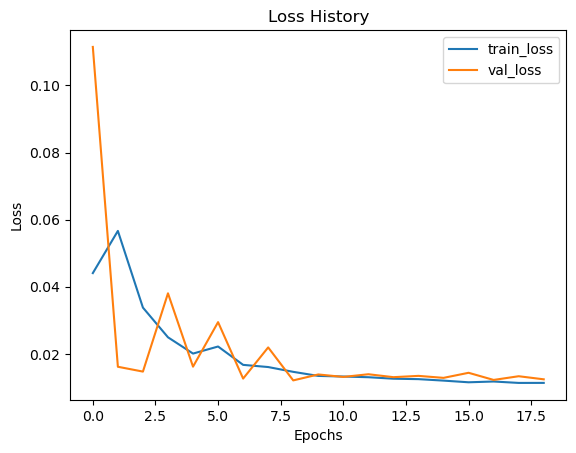

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

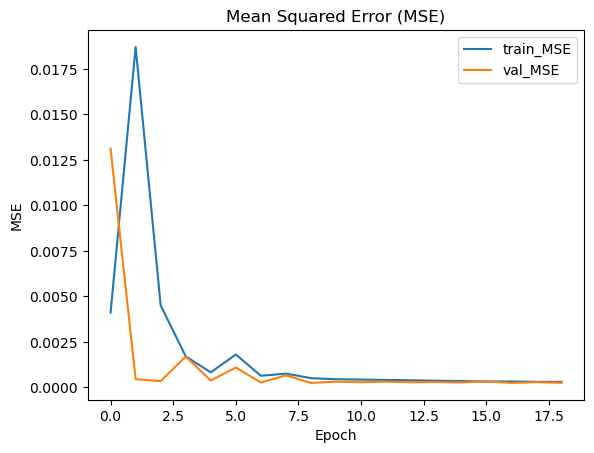

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

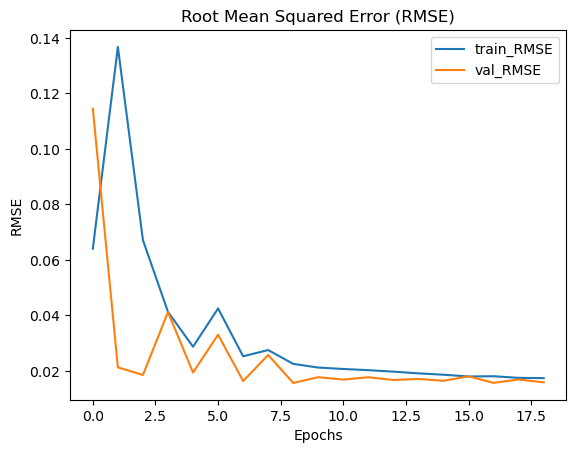

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

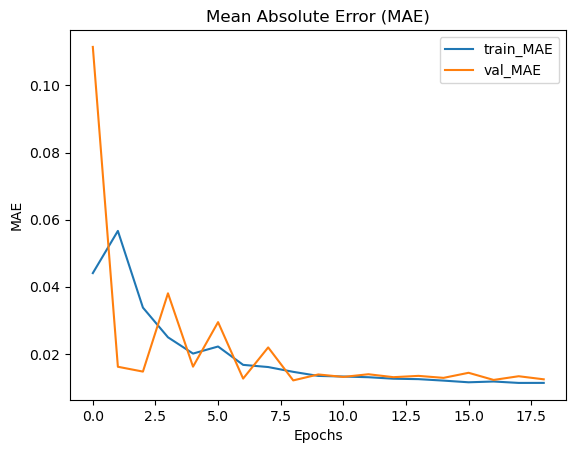

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

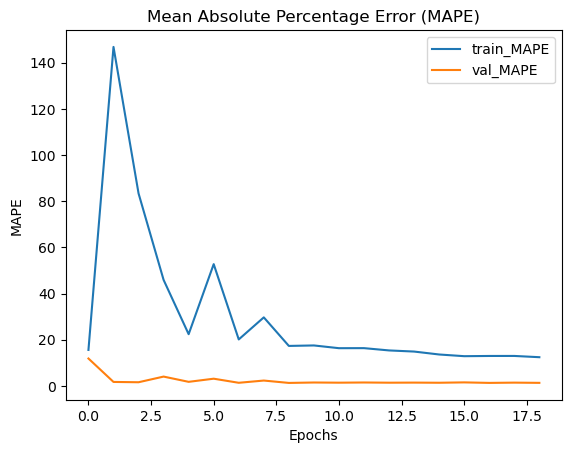

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:21:20.187066: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


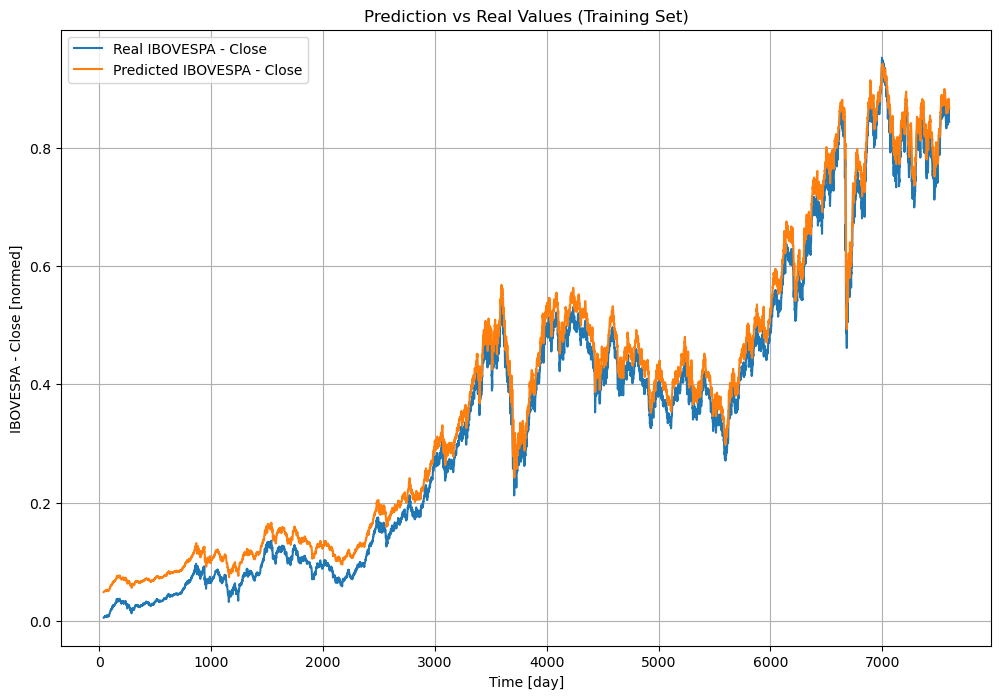

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


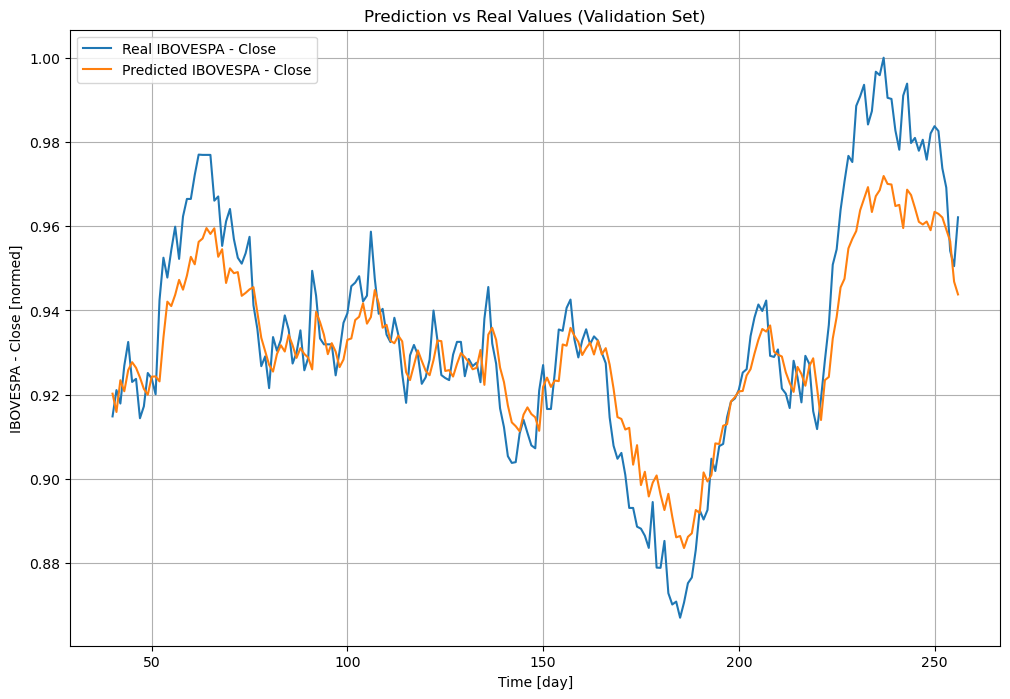

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


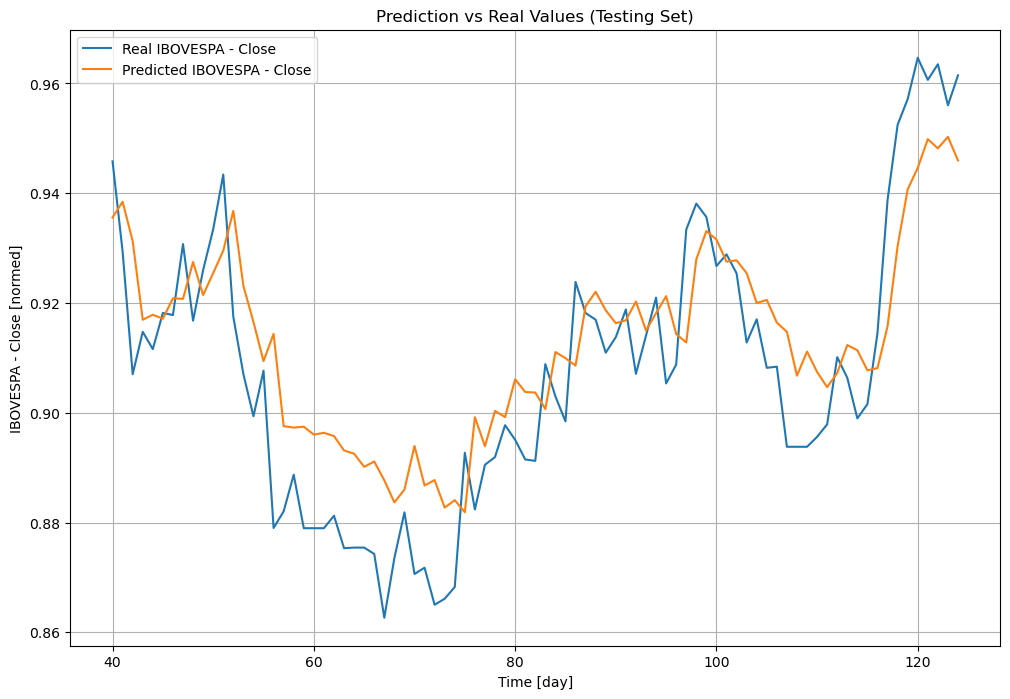

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

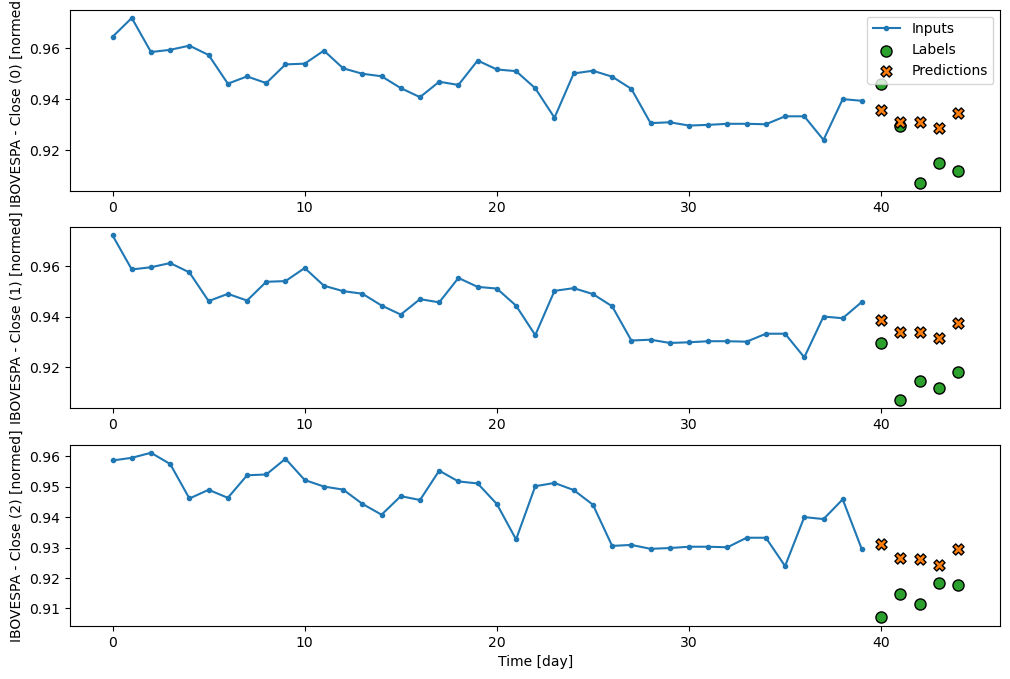

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:33s:537ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[[0.93557703, 0.93557703, 0.93557703, ..., 0.93557703,
         0.93557703, 0.93557703],
        [0.9311205 , 0.9311205 , 0.9311205 , ..., 0.9311205 ,
         0.9311205 , 0.9311205 ],
        [0.931018  , 0.931018  , 0.931018  , ..., 0.931018  ,
         0.931018  , 0.931018  ],
        [0.9287962 , 0.9287962 , 0.9287962 , ..., 0.9287962 ,
         0.9287962 , 0.9287962 ],
        [0.9344402 , 0.9344402 , 0.9344402 , ..., 0.9344402 ,
         0.93443996, 0.93443996]],

       [[0.93844724, 0.93844724, 0.93844724, ..., 0.93844724,
         0.93844724, 0.93844724],
        [0.9340098 , 0.9340098 , 0.9340098 , ..., 0.9340098 ,
         0.9340098 , 0.9340098 ],
        [0.93393457, 0.93393457, 0.93393457, ..., 0.93393457,
         0.93393457, 0.93393457],
        [0.9316522 , 0.9316522 , 0.9316522 , ..., 0.9316522 ,
         0.9316522 , 0.9316522 ],
        [0.93740475, 0.93740475, 0.93740475, ..., 0.93740475,
         0.9374045 , 0.9374045 ]],

       [[0.93127   , 0.93127   , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')